<a href="https://colab.research.google.com/github/deepakk7195/IISC_CDS_DS/blob/Business_Analytics/MiniProject_4_AirQuality_Forecast_ARIMA_Team_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Air quality forecasting using ARIMA

## Learning Objectives

At the end of the experiment, you will be able to :

* perform EDA on time series data
* analyze the auto correlation and partial auto correlation plots
* implement the ARIMA model and forecast the air quality

## Information

ARIMA stands for auto-regressive integrated moving average. It’s a way of modelling time series data for forecasting (i.e., for predicting future points in the series), in such a way that:

* a pattern of growth/decline in the data is accounted for (“auto-regressive” part)
* the rate of change of the growth/decline in the data is accounted for (the “integrated” part)
* noise between consecutive time points is accounted for (the “moving average” part)

ARIMA models are typically expressed like “ARIMA(p,d,q)”, with the three terms p, d, and q defined as follows:

* p means the number of preceding (“lagged”) Y values that have to be added/subtracted to Y in the model, so as to make better predictions based on local periods of growth/decline in our data. This captures the “autoregressive” nature of ARIMA.

* d represents the number of times that the data have to be “differenced” to produce a stationary signal (i.e., a signal that has a constant mean over time). This captures the “integrated” nature of ARIMA. If d=0, this means that our data does not tend to go up/down in the long term (i.e., the model is already “stationary”). In this case, then technically you are performing just ARMA, not AR-I-MA. If p is 1, then it means that the data is going up/down linearly. If p is 2, then it means that the data is going up/down exponentially. More on this below…

* q represents the number of preceding/lagged values for the error term that are added/subtracted to Y. This captures the “moving average” part of ARIMA.



Refer to the basics of Air quality index [here](https://www.airnow.gov/aqi/aqi-basics/)

## Dataset



This dataset includes hourly air pollutants data from 12 nationally-controlled air-quality monitoring sites. The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration. The time period is from March 1st, 2013 to February 28th, 2017. Missing data are denoted as NA.

**Attributes Information:**

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* PM2.5: PM2.5 concentration (ug/m^3)

  Fine particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high. PM2.5 are tiny particles in the air that reduce visibility and cause the air to appear hazy when levels are elevated

* PM10: PM10 concentration (ug/m^3)
* SO2: SO2 concentration (ug/m^3)
* NO2: NO2 concentration (ug/m^3)
* CO: CO concentration (ug/m^3)
* O3: O3 concentration (ug/m^3)
* TEMP: temperature (degree Celsius)
* PRES: pressure (hPa)
* DEWP: dew point temperature (degree Celsius)
* RAIN: precipitation (mm)
* wd: wind direction
* WSPM: wind speed (m/s)
* station: name of the air-quality monitoring site

**Dataset source:** https://archive.ics.uci.edu/dataset/501/beijing+multi+site+air+quality+data

## Problem Statement

Implement ARIMA model to forecast the air quality using Beijing air quality dataset

## Grading = 10 Points

In [ ]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/PRSA_Data_Nongzhanguan_20130301_20170228.csv
print("Dataset downloaded successfully!!")

Dataset downloaded successfully!!


### Import required Packages

In [ ]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from scipy.special import expit, logit
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import itertools
from datetime import datetime
import plotly.express as px
from sklearn.impute import SimpleImputer

### Load the data and analyze (2 Points)

Refer to casestudy: [M5_NB_Case_Study_EDA_Air_Quality_Data](https://drive.google.com/file/d/1FJRST0iRon3-4kL6Wh0tK_AtHa0qLlS7/view?usp=drive_link)

In [ ]:
path = "PRSA_Data_Nongzhanguan_20130301_20170228.csv"
# YOUR CODE HERE

In [ ]:
# defining a function for date time
def convert_to_date(x):
  return datetime.strptime(x, '%Y %m %d %H')

In [ ]:
dfAirQuality = pd.read_csv('PRSA_Data_Nongzhanguan_20130301_20170228.csv', parse_dates=[['year', 'month', 'day', 'hour']], date_parser=convert_to_date, keep_date_col=True)

In [ ]:
dfAirQuality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34436 non-null  float64       
 7   PM10                 34624 non-null  float64       
 8   SO2                  34618 non-null  float64       
 9   NO2                  34372 non-null  float64       
 10  CO                   33858 non-null  float64       
 11  O3                   34558 non-null  float64       
 12  TEMP                 35044 non-null  float64       
 13  PRES                 35044 non-

In [ ]:
print("\nMissing values  :", dfAirQuality.isnull().any())



Missing values  : year_month_day_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool


In [ ]:
dfAirQuality.describe()

year_month_day_hour            No         PM2.5          PM10  \
count                35064  35064.000000  34436.000000  34624.000000   
mean   2015-03-01 11:30:00  17532.500000     84.838483    108.991096   
min    2013-03-01 00:00:00      1.000000      2.000000      2.000000   
25%    2014-03-01 05:45:00   8766.750000     22.000000     38.000000   
50%    2015-03-01 11:30:00  17532.500000     59.000000     85.000000   
75%    2016-02-29 17:15:00  26298.250000    116.000000    149.000000   
max    2017-02-28 23:00:00  35064.000000    844.000000    995.000000   
std                    NaN  10122.249256     86.225344     95.341177   

                SO2           NO2            CO            O3          TEMP  \
count  34618.000000  34372.000000  33858.000000  34558.000000  35044.000000   
mean      18.689242     58.097172   1324.350198     58.534682     13.671490   
min        0.571200      2.000000    100.000000      0.214200    -16.800000   
25%        3.000000     29.000000    500.000000     10.000000      3.100000   
50%        9.000000     51.000000    900.000000     45.000000     14.600000   
75%       23.000000     80.000000   1600.000000     84.000000     23.500000   
max      257.000000    273.000000  10000.000000    390.000000     41.100000   
std       24.280665     36.297740   1245.166124     58.401448     11.458418   

               PRES          DEWP          RAIN          WSPM  
count  35044.000000  35044.000000  35044.000000  35050.000000  
mean    1012.547419      2.447535      0.064020      1.860785  
min      987.100000    -35.300000      0.000000      0.000000  
25%     1004.000000     -8.800000      0.000000      1.000000  
50%     1012.200000      3.000000      0.000000      1.500000  
75%     1020.900000     15.000000      0.000000      2.400000  
max     1042.000000     28.800000     46.400000     10.500000  
std       10.266059     13.810696      0.786282      1.280368

**PM2.5 is the air quality feature we are looking to predict. This shows wide fluctuations as can be seen by a mean value of 84.83 and a max value of 844**

In [ ]:
median_value = dfAirQuality['PM2.5'].median()
print(median_value)

59.0


In [ ]:

dfAirQualityIndexed = dfAirQuality.set_index('year_month_day_hour')

In [ ]:
dfAirQualityIndexed.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='year_month_day_hour', length=35064, freq=None)

In [ ]:
# Printing values from 1st march, 2013 to 5th march, 2013, to see the use DatetimeIndex
dfAirQualityIndexed.loc['2013-03-01':'2013-03-05']

No  year month day hour  PM2.5   PM10    SO2    NO2  \
year_month_day_hour                                                         
2013-03-01 00:00:00    1  2013     3   1    0    5.0   14.0    4.0   12.0   
2013-03-01 01:00:00    2  2013     3   1    1    8.0   12.0    6.0   14.0   
2013-03-01 02:00:00    3  2013     3   1    2    3.0    6.0    5.0   14.0   
2013-03-01 03:00:00    4  2013     3   1    3    5.0    5.0    5.0   14.0   
2013-03-01 04:00:00    5  2013     3   1    4    5.0    5.0    6.0   21.0   
...                  ...   ...   ...  ..  ...    ...    ...    ...    ...   
2013-03-05 19:00:00  116  2013     3   5   19  185.0  204.0   97.0  175.0   
2013-03-05 20:00:00  117  2013     3   5   20  203.0  218.0  102.0  184.0   
2013-03-05 21:00:00  118  2013     3   5   21  217.0  226.0  117.0  183.0   
2013-03-05 22:00:00  119  2013     3   5   22  235.0  238.0  123.0  185.0   
2013-03-05 23:00:00  120  2013     3   5   23  242.0  243.0  122.0  181.0   

                         CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2013-03-01 00:00:00   200.0  85.0  -0.5  1024.5 -21.4   0.0  NNW   5.7   
2013-03-01 01:00:00   200.0  84.0  -0.7  1025.1 -22.1   0.0   NW   3.9   
2013-03-01 02:00:00   200.0  83.0  -1.2  1025.3 -24.6   0.0  NNW   5.3   
2013-03-01 03:00:00   200.0  84.0  -1.4  1026.2 -25.5   0.0    N   4.9   
2013-03-01 04:00:00   200.0  77.0  -1.9  1027.1 -24.5   0.0  NNW   3.2   
...                     ...   ...   ...     ...   ...   ...  ...   ...   
2013-03-05 19:00:00  2200.0  48.0   6.7  1010.4  -5.0   0.0  ESE   0.1   
2013-03-05 20:00:00  2700.0  48.0   5.2  1010.7  -4.7   0.0    N   0.0   
2013-03-05 21:00:00  2799.0  48.0   4.3  1010.5  -2.6   0.0  ENE   1.0   
2013-03-05 22:00:00  3299.0  48.0   4.3  1010.7  -4.2   0.0    E   0.8   
2013-03-05 23:00:00  3299.0  48.0   4.9  1010.5  -5.8   0.0    E   0.0   

                          station  
year_month_day_hour                
2013-03-01 00:00:00  Nongzhanguan  
2013-03-01 01:00:00  Nongzhanguan  
2013-03-01 02:00:00  Nongzhanguan  
2013-03-01 03:00:00  Nongzhanguan  
2013-03-01 04:00:00  Nongzhanguan  
...                           ...  
2013-03-05 19:00:00  Nongzhanguan  
2013-03-05 20:00:00  Nongzhanguan  
2013-03-05 21:00:00  Nongzhanguan  
2013-03-05 22:00:00  Nongzhanguan  
2013-03-05 23:00:00  Nongzhanguan  

[120 rows x 18 columns]

In [ ]:
dfPM25 = dfAirQualityIndexed['PM2.5']
dfPM25.head()

year_month_day_hour
2013-03-01 00:00:00    5.0
2013-03-01 01:00:00    8.0
2013-03-01 02:00:00    3.0
2013-03-01 03:00:00    5.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

<Axes: xlabel='year_month_day_hour'>

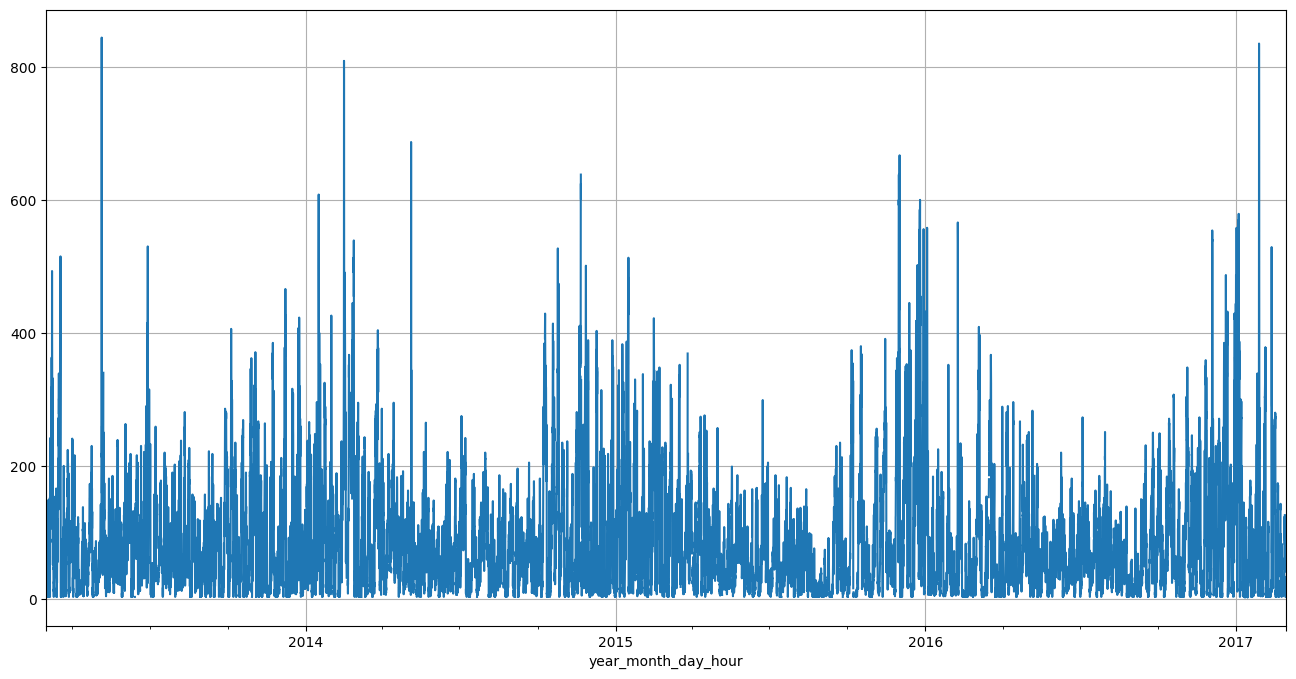

In [ ]:
dfPM25.plot(grid=True, figsize=(16, 8))

**This seems to indicate seasonality in PM2.5 data. It seems to increase during winter and come down druing summer (similar to air pollution in New Delhi).**

In [ ]:
dfAirQualityIndexed

No  year month day hour  PM2.5  PM10  SO2   NO2  \
year_month_day_hour                                                       
2013-03-01 00:00:00      1  2013     3   1    0    5.0  14.0  4.0  12.0   
2013-03-01 01:00:00      2  2013     3   1    1    8.0  12.0  6.0  14.0   
2013-03-01 02:00:00      3  2013     3   1    2    3.0   6.0  5.0  14.0   
2013-03-01 03:00:00      4  2013     3   1    3    5.0   5.0  5.0  14.0   
2013-03-01 04:00:00      5  2013     3   1    4    5.0   5.0  6.0  21.0   
...                    ...   ...   ...  ..  ...    ...   ...  ...   ...   
2017-02-28 19:00:00  35060  2017     2  28   19   14.0  21.0  3.0  27.0   
2017-02-28 20:00:00  35061  2017     2  28   20   18.0  27.0  3.0  37.0   
2017-02-28 21:00:00  35062  2017     2  28   21   15.0  39.0  5.0  50.0   
2017-02-28 22:00:00  35063  2017     2  28   22   11.0  35.0  6.0  49.0   
2017-02-28 23:00:00  35064  2017     2  28   23   10.0  28.0  7.0  48.0   

                        CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                     
2013-03-01 00:00:00  200.0  85.0  -0.5  1024.5 -21.4   0.0  NNW   5.7   
2013-03-01 01:00:00  200.0  84.0  -0.7  1025.1 -22.1   0.0   NW   3.9   
2013-03-01 02:00:00  200.0  83.0  -1.2  1025.3 -24.6   0.0  NNW   5.3   
2013-03-01 03:00:00  200.0  84.0  -1.4  1026.2 -25.5   0.0    N   4.9   
2013-03-01 04:00:00  200.0  77.0  -1.9  1027.1 -24.5   0.0  NNW   3.2   
...                    ...   ...   ...     ...   ...   ...  ...   ...   
2017-02-28 19:00:00  400.0  72.0  12.5  1013.5 -16.2   0.0   NW   2.4   
2017-02-28 20:00:00  400.0  59.0  11.6  1013.6 -15.1   0.0  WNW   0.9   
2017-02-28 21:00:00  600.0  41.0  10.8  1014.2 -13.3   0.0   NW   1.1   
2017-02-28 22:00:00  500.0  41.0  10.5  1014.4 -12.9   0.0  NNW   1.2   
2017-02-28 23:00:00  600.0  39.0   8.6  1014.1 -15.9   0.0  NNE   1.3   

                          station  
year_month_day_hour                
2013-03-01 00:00:00  Nongzhanguan  
2013-03-01 01:00:00  Nongzhanguan  
2013-03-01 02:00:00  Nongzhanguan  
2013-03-01 03:00:00  Nongzhanguan  
2013-03-01 04:00:00  Nongzhanguan  
...                           ...  
2017-02-28 19:00:00  Nongzhanguan  
2017-02-28 20:00:00  Nongzhanguan  
2017-02-28 21:00:00  Nongzhanguan  
2017-02-28 22:00:00  Nongzhanguan  
2017-02-28 23:00:00  Nongzhanguan  

[35064 rows x 18 columns]

In [ ]:
fig = px.line(dfAirQuality, x = 'year_month_day_hour', y = 'PM2.5', title='PM2.5 with slider')

# visible the slider
fig.update_xaxes(rangeslider_visible=True)
fig.show()

Text(0.5, 1.0, 'Air Quality plot of PM2.5 for the year 2014 and 2015')

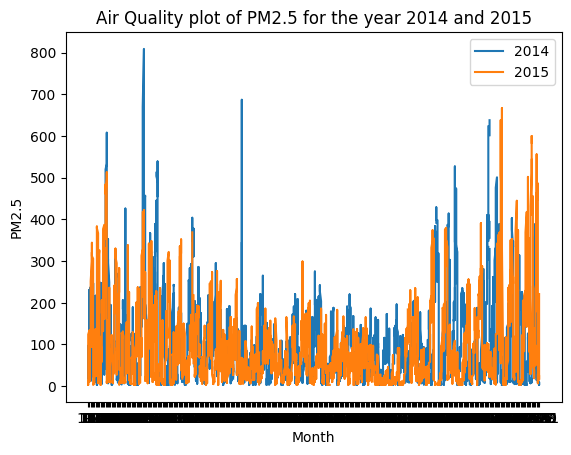

In [ ]:
# Visualize data for 2 years, let us say, 2014 and 2015, to visually see the level of seasonality
df_2014 = dfAirQuality[dfAirQuality['year'] == '2014'].reset_index()
df_2015 = dfAirQuality[dfAirQuality['year'] == '2015'].reset_index()
# removing the hour using lambda function
df_2014['month_day_hour']=df_2014.apply(lambda x : str(x['month'])+"-"+x['day'], axis=1)
df_2015['month_day_hour']=df_2015.apply(lambda x : str(x['month'])+"-"+x['day'], axis=1)
plt.plot(df_2014['month_day_hour'], df_2014['PM2.5'])
plt.plot(df_2015['month_day_hour'], df_2015['PM2.5'])
plt.legend(['2014','2015'])
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('Air Quality plot of PM2.5 for the year 2014 and 2015')

***Significant overlap of 2014 and 2015 plots confirms seasonality.***

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

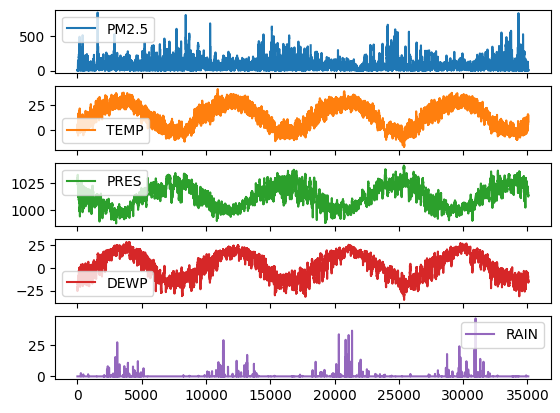

In [ ]:
# plotting multiple weather related variables with PM2.5
multi_data = dfAirQuality[['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN']]
multi_data.plot(subplots=True)

PM2.5  and  CO  have almost the same trend in variation. PM2.5  and  O3  have opposite trend in variation.

Imputing NULL Values of PM2.5

In [ ]:
mean_PM25 = dfAirQualityIndexed['PM2.5'].mean()

In [ ]:
mean_PM25

84.83848298292484

In [ ]:
dfAirQualityIndexed['PM2.5'].isnull().sum()


628

In [ ]:
dfAirQualityIndexed['PM2.5'].fillna(mean_PM25, inplace=True)

In [ ]:
dfAirQualityIndexed['PM2.5'].isnull().sum()

0

### Correlation plot between Features (1 Point)

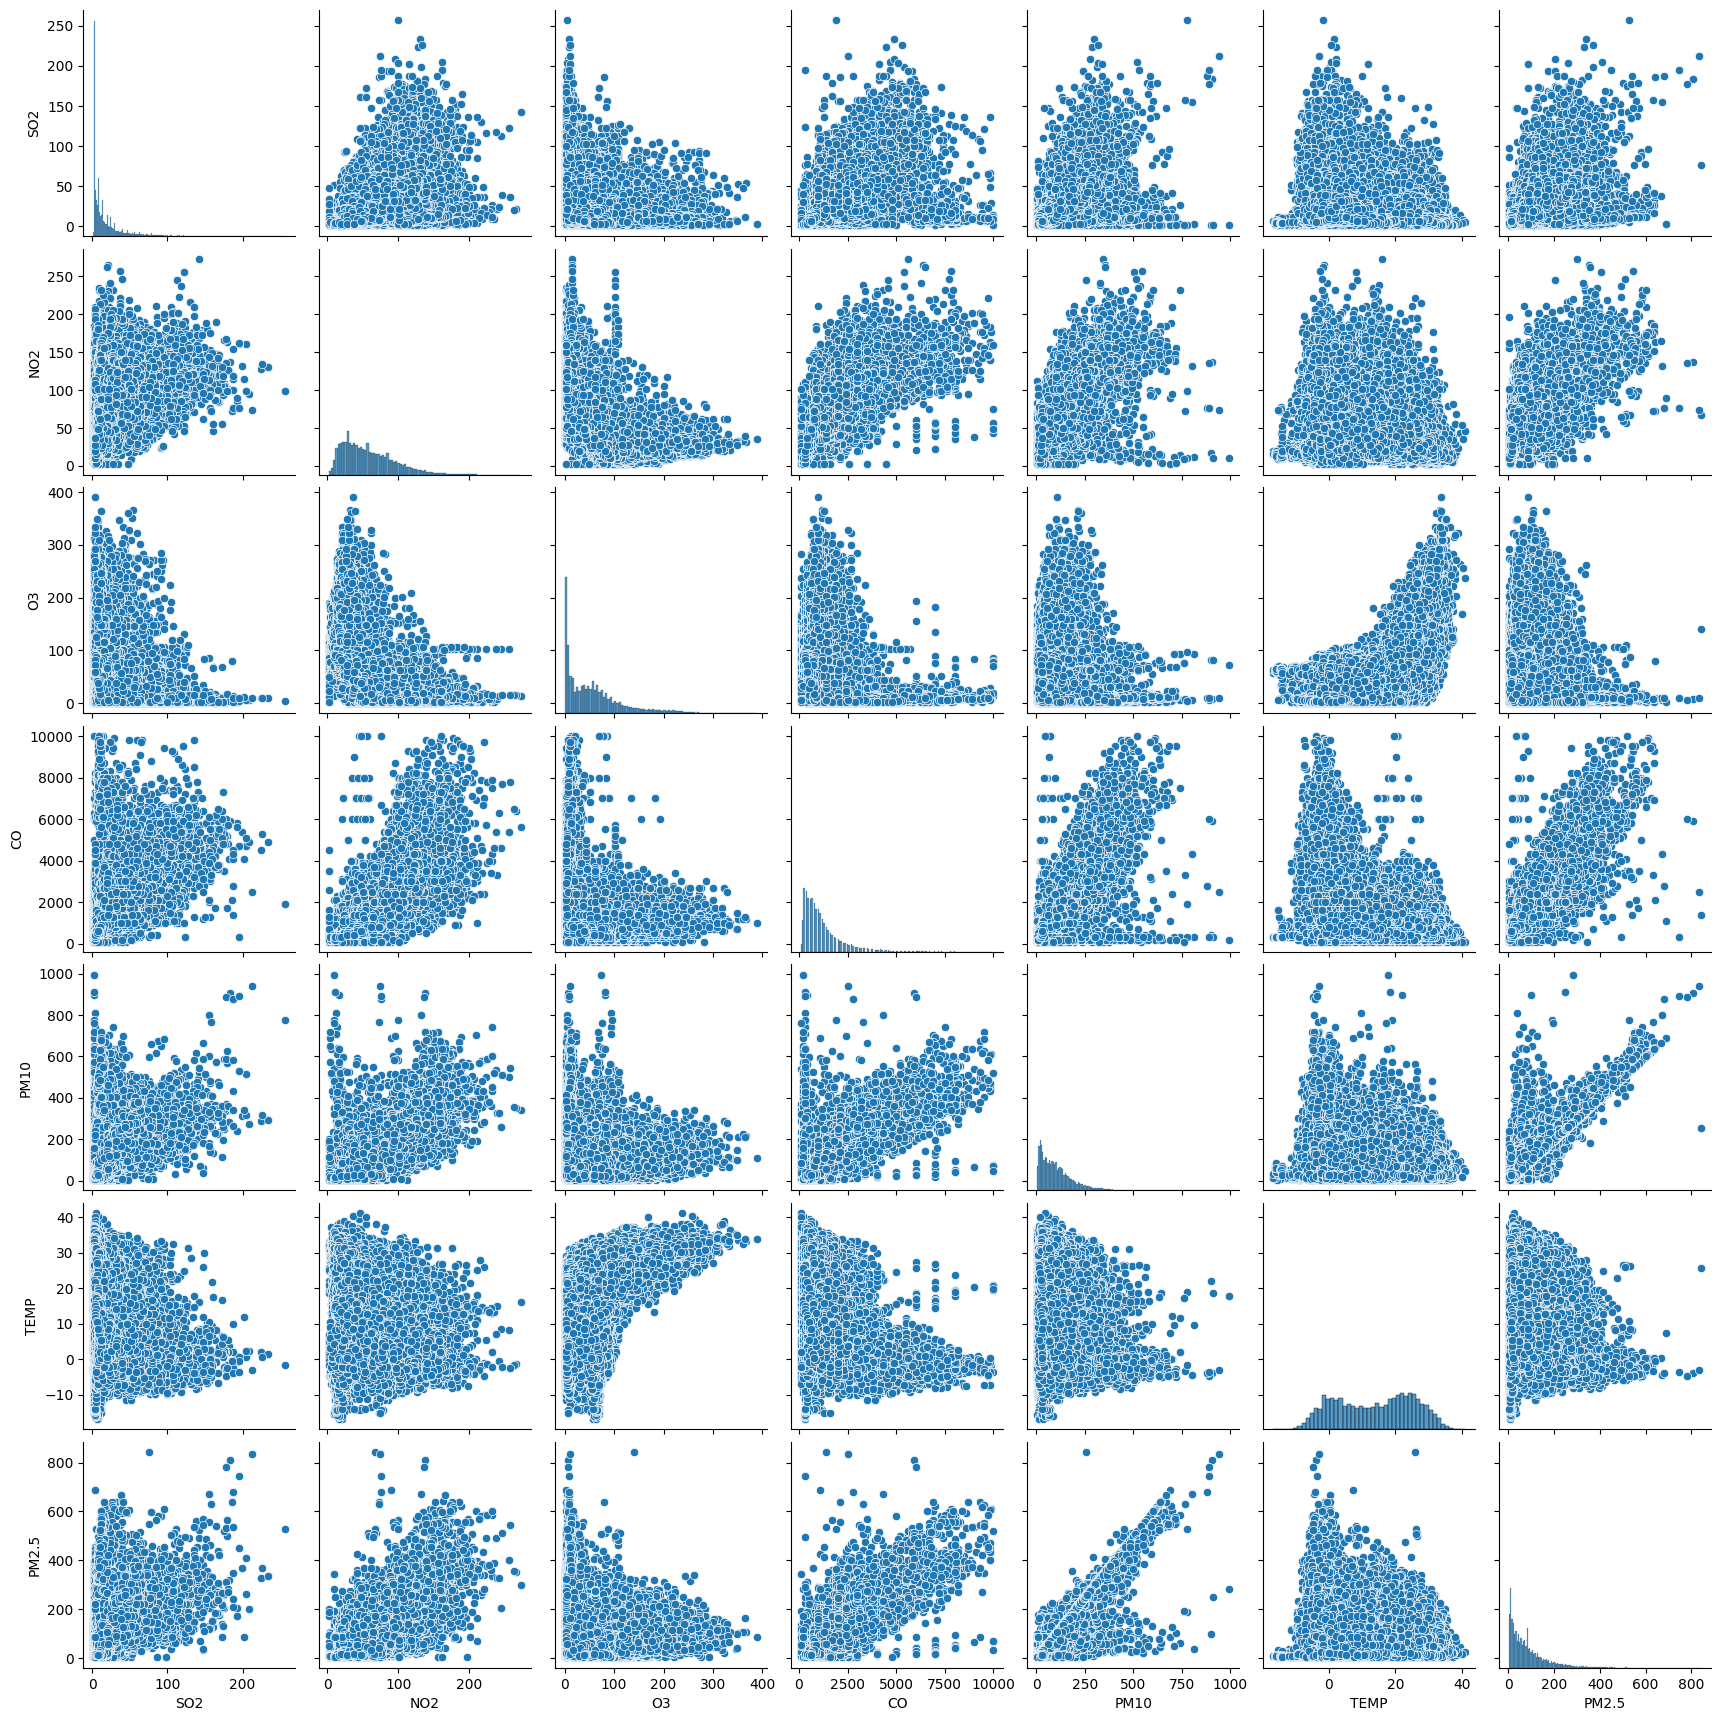

In [ ]:
# YOUR CODE HERE
g = sns.pairplot(dfAirQualityIndexed[['SO2','NO2','O3','CO', 'PM10', 'TEMP', 'PM2.5']])

***PM2.5 seems to be correlated with PM10, CO and to some extent with NO2 also.***

In [ ]:
aq_pear_corr = dfAirQualityIndexed[['SO2','NO2','O3','CO', 'PM10', 'TEMP', 'PM2.5']].corr(method='pearson')

In [ ]:
aq_pear_corr

SO2       NO2        O3        CO      PM10      TEMP     PM2.5
SO2    1.000000  0.498376 -0.190739  0.568786  0.521346 -0.359613  0.531303
NO2    0.498376  1.000000 -0.524125  0.703330  0.676272 -0.302752  0.687242
O3    -0.190739 -0.524125  1.000000 -0.315599 -0.161575  0.608806 -0.187831
CO     0.568786  0.703330 -0.315599  1.000000  0.740188 -0.320972  0.811624
PM10   0.521346  0.676272 -0.161575  0.740188  1.000000 -0.145583  0.902028
TEMP  -0.359613 -0.302752  0.608806 -0.320972 -0.145583  1.000000 -0.171991
PM2.5  0.531303  0.687242 -0.187831  0.811624  0.902028 -0.171991  1.000000

***Correlation coefficients also indicate strong correlation for PM2.5 with PM10 and CO and a moderate correlation with NO2.***

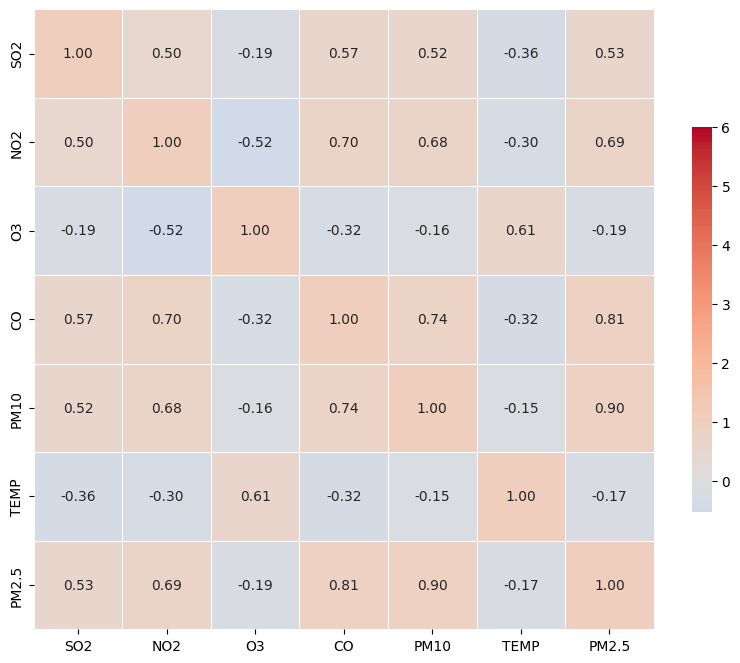

In [ ]:
g = sns.heatmap(aq_pear_corr, vmax=6, center=0,
                square=True, linewidths=0.5, cbar_kws={'shrink': 0.5}, annot=True, fmt='0.2f', cmap='coolwarm')
g.figure.set_size_inches(10, 10)


plt.show()

### Identify the trends and seasonality from the given time series data (1 Point)

Hint: `seasonal_decompose()`

In [ ]:
dfAirQualityIndexed.head()

No  year month day hour  PM2.5  PM10  SO2   NO2     CO  \
year_month_day_hour                                                           
2013-03-01 00:00:00   1  2013     3   1    0    5.0  14.0  4.0  12.0  200.0   
2013-03-01 01:00:00   2  2013     3   1    1    8.0  12.0  6.0  14.0  200.0   
2013-03-01 02:00:00   3  2013     3   1    2    3.0   6.0  5.0  14.0  200.0   
2013-03-01 03:00:00   4  2013     3   1    3    5.0   5.0  5.0  14.0  200.0   
2013-03-01 04:00:00   5  2013     3   1    4    5.0   5.0  6.0  21.0  200.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
year_month_day_hour                                                           
2013-03-01 00:00:00  85.0  -0.5  1024.5 -21.4   0.0  NNW   5.7  Nongzhanguan  
2013-03-01 01:00:00  84.0  -0.7  1025.1 -22.1   0.0   NW   3.9  Nongzhanguan  
2013-03-01 02:00:00  83.0  -1.2  1025.3 -24.6   0.0  NNW   5.3  Nongzhanguan  
2013-03-01 03:00:00  84.0  -1.4  1026.2 -25.5   0.0    N   4.9  Nongzhanguan  
2013-03-01 04:00:00  77.0  -1.9  1027.1 -24.5   0.0  NNW   3.2  Nongzhanguan

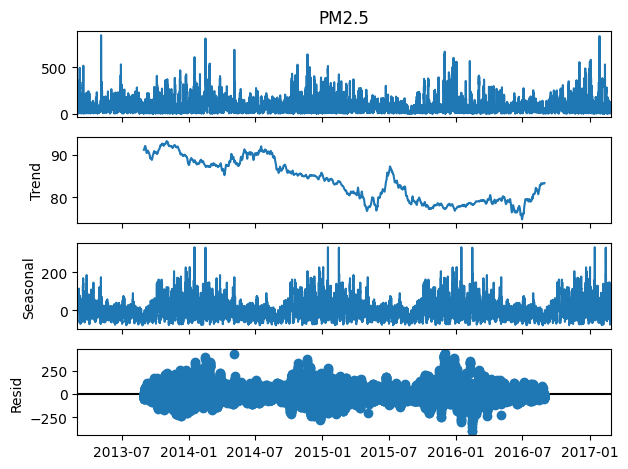

In [ ]:
# YOUR CODE HERE
from statsmodels.tsa.seasonal import seasonal_decompose

# Select only the numerical columns for decomposition
numerical_columns = dfAirQualityIndexed.select_dtypes(include=['number']).columns
df_numerical = dfAirQualityIndexed[numerical_columns]

result = seasonal_decompose(df_numerical['PM2.5'], model='additive', period = 8760)
result.plot()
plt.show()


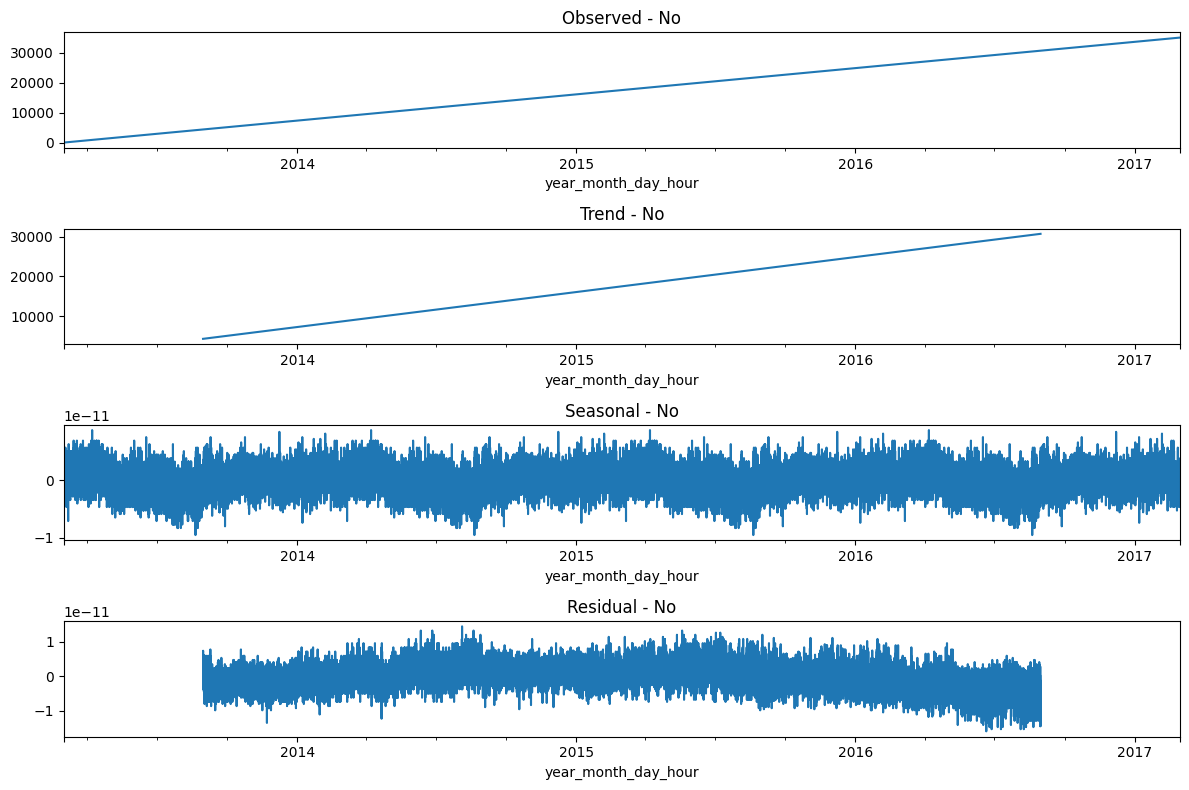

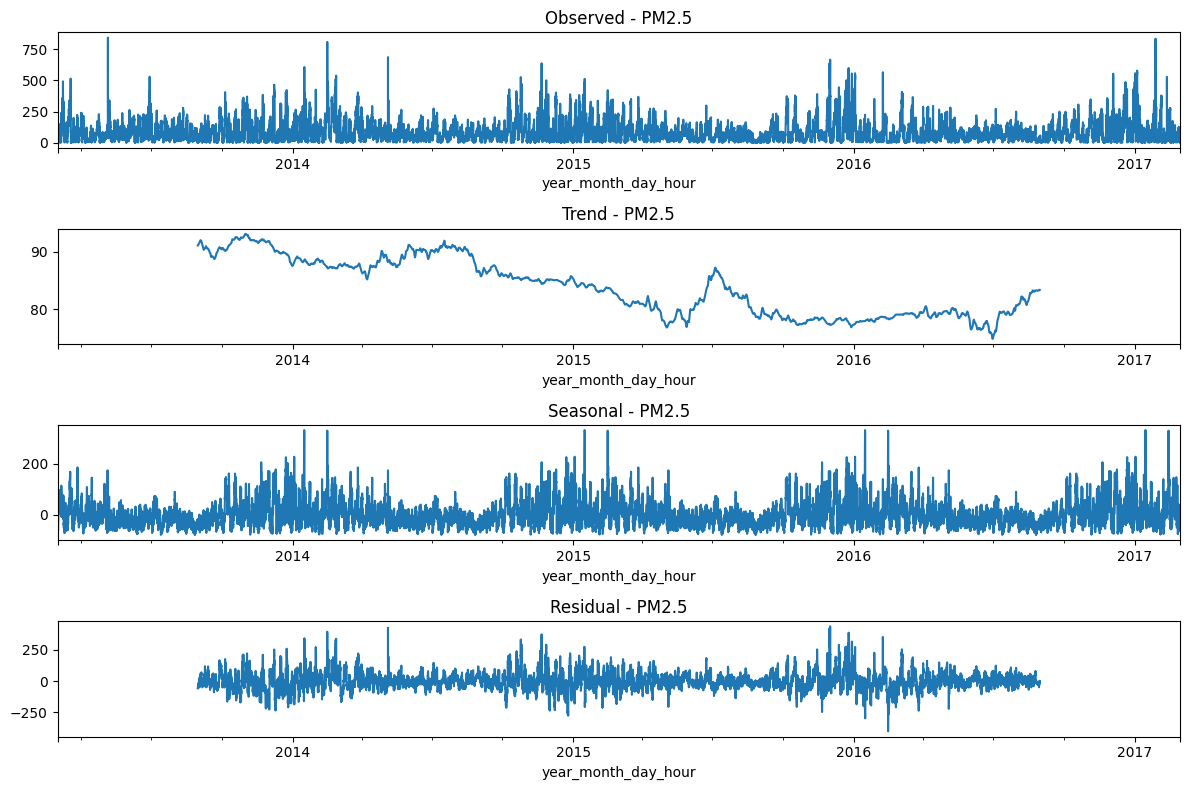

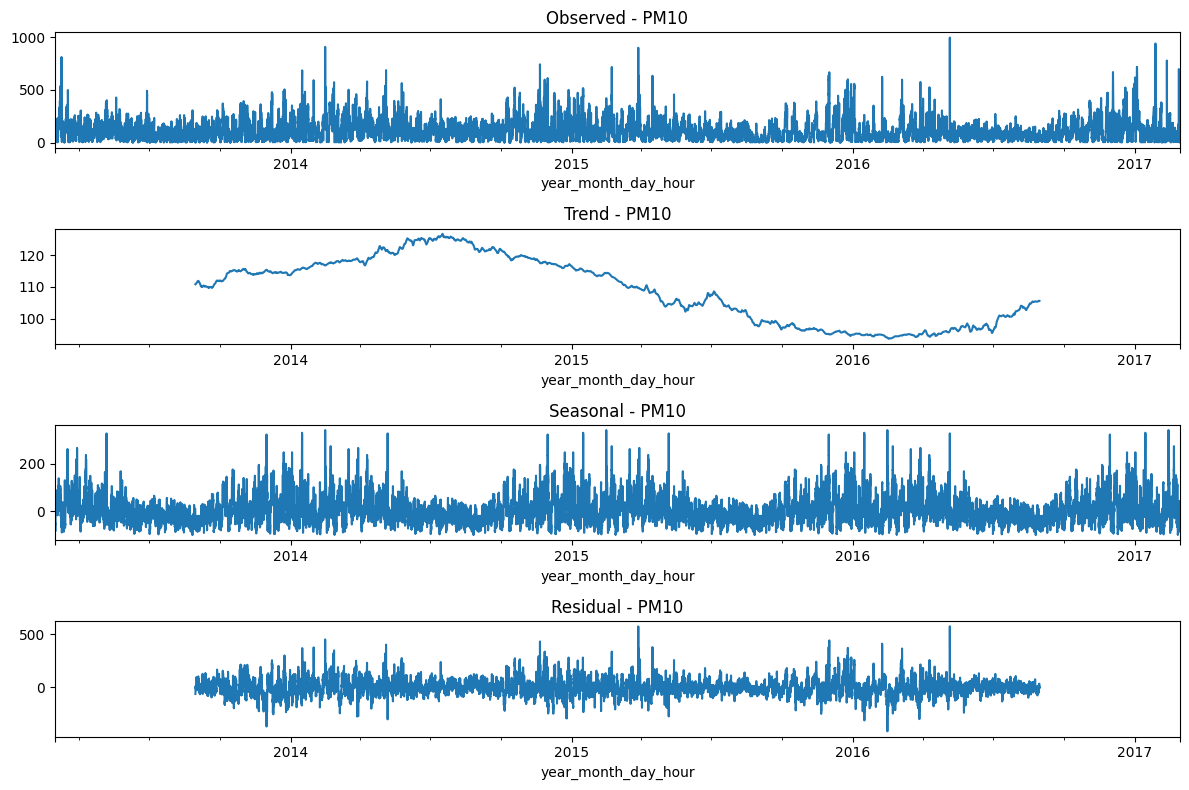

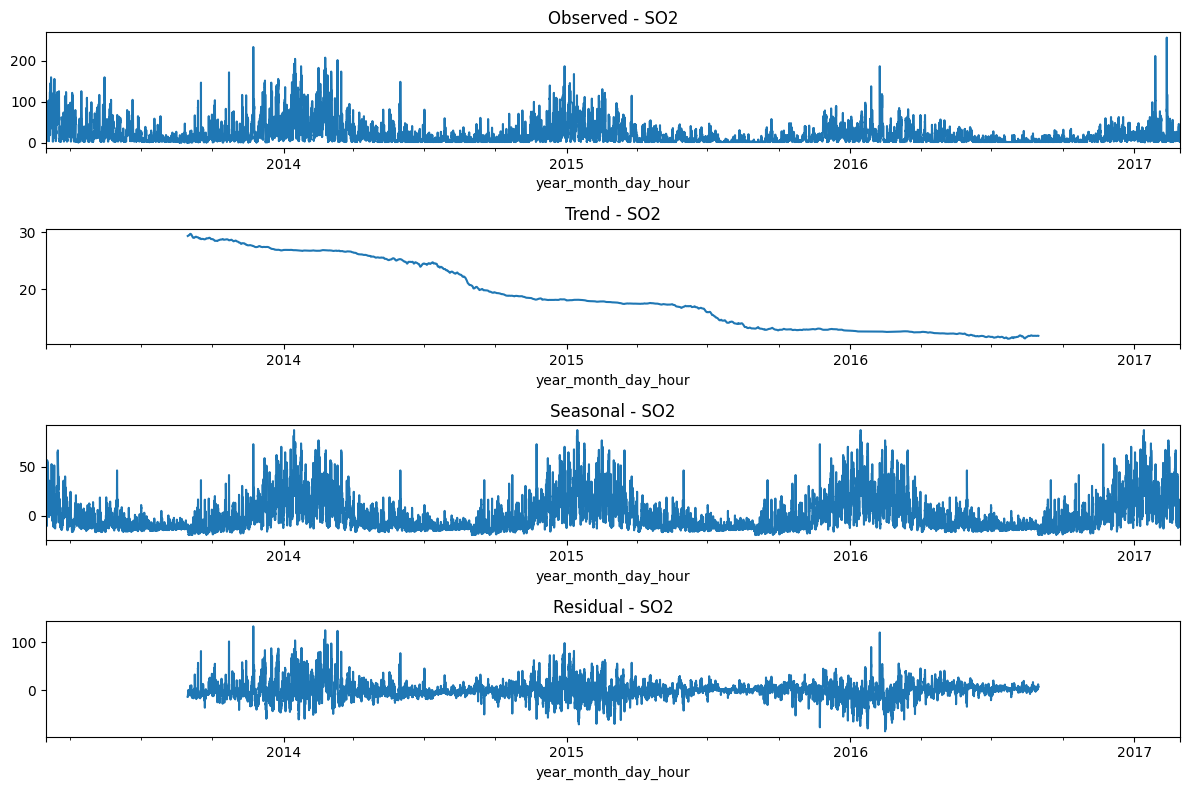

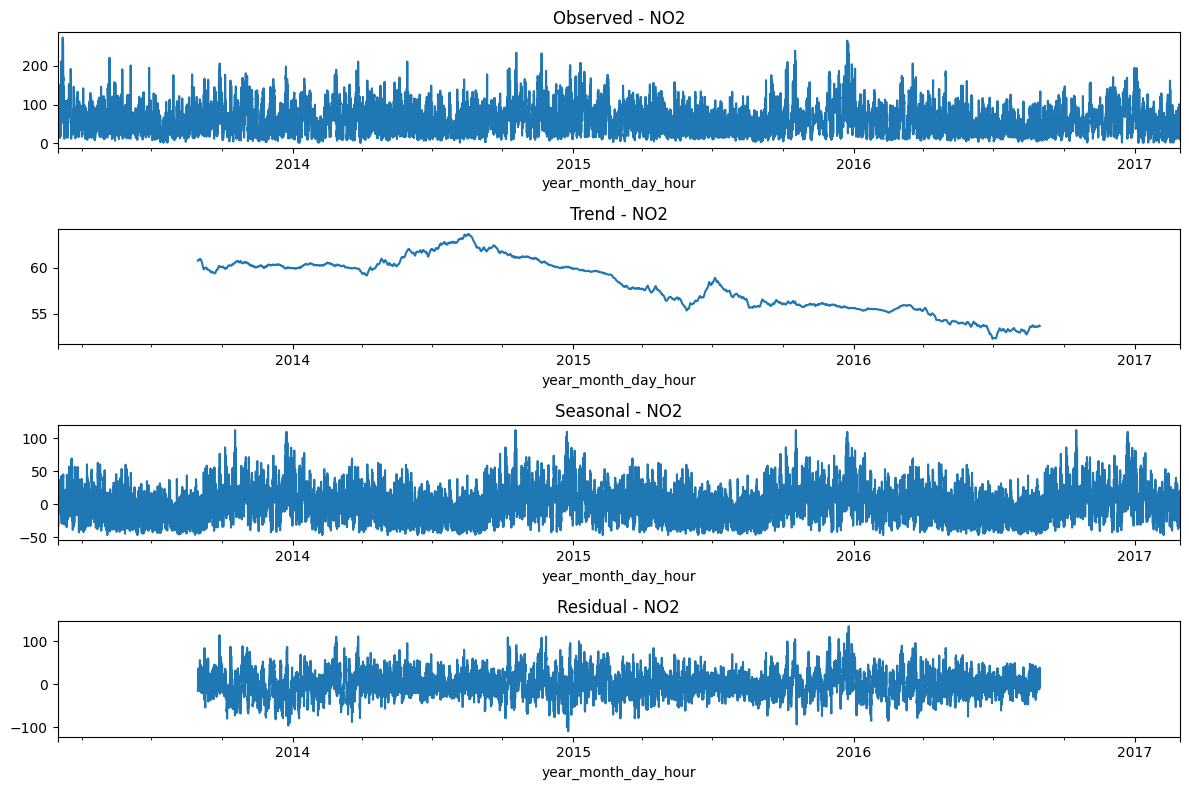

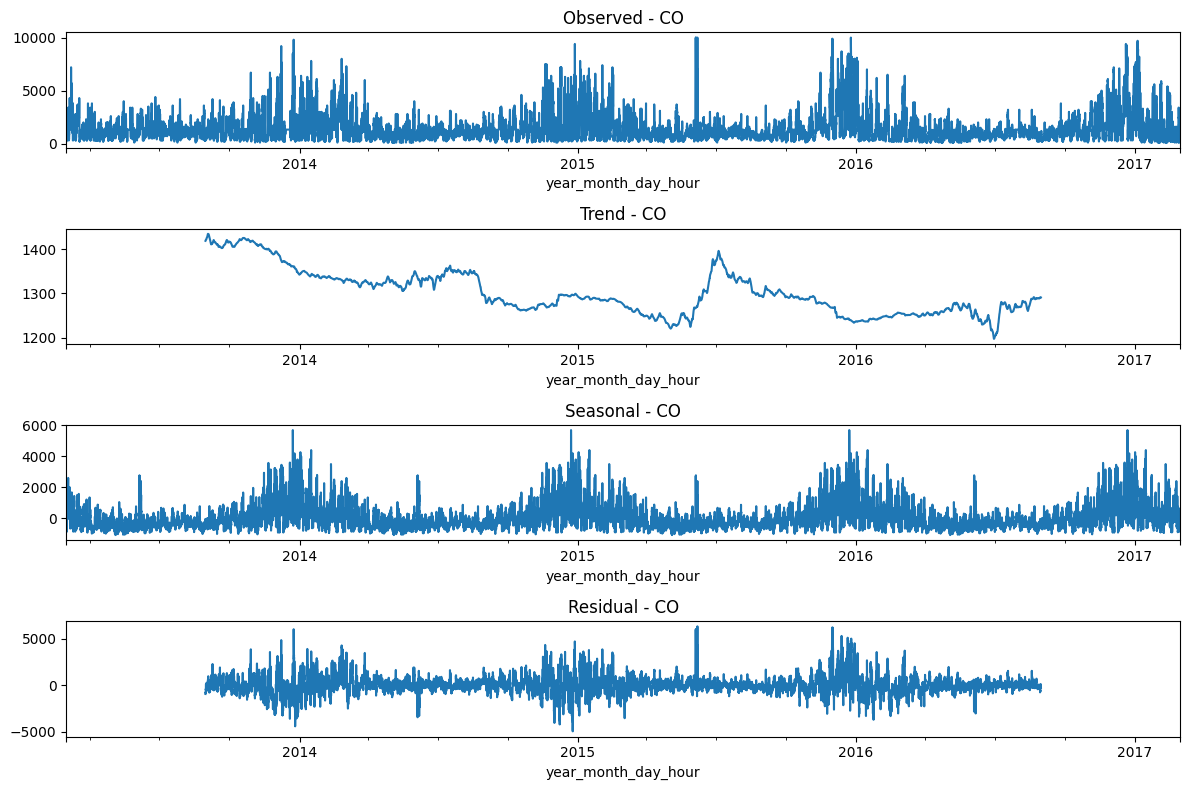

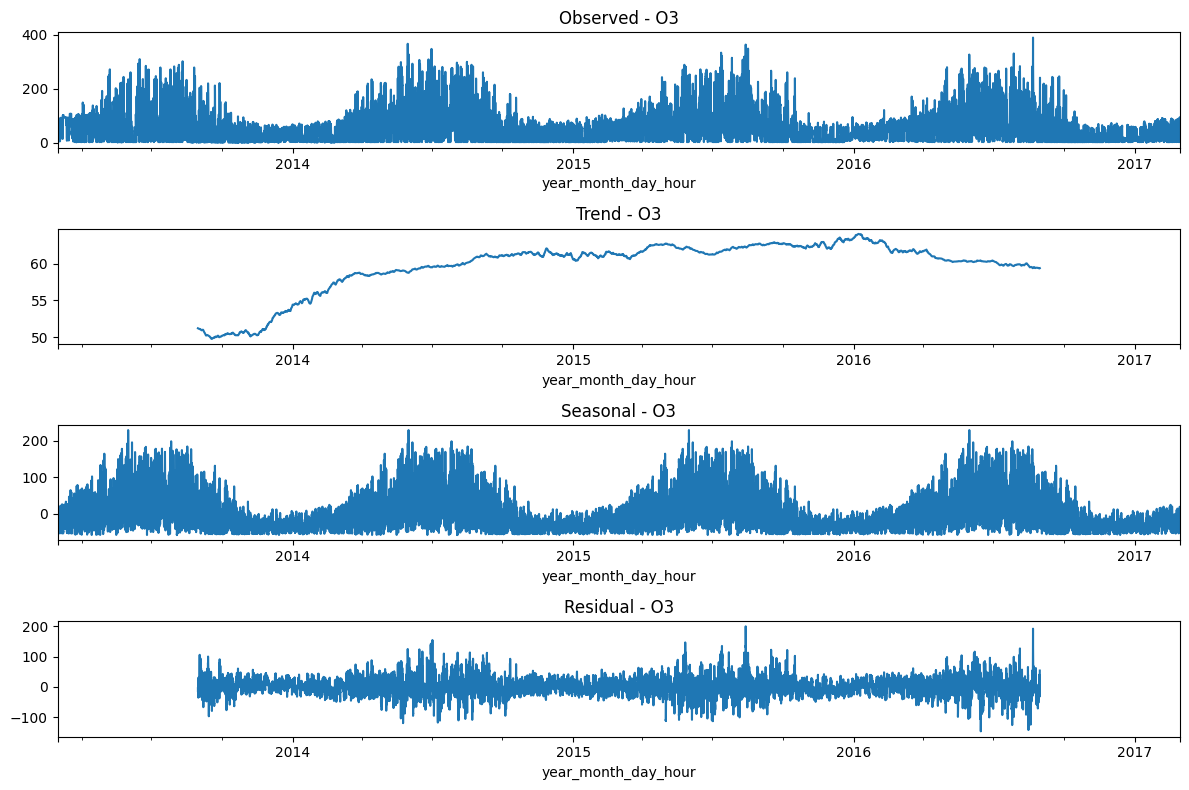

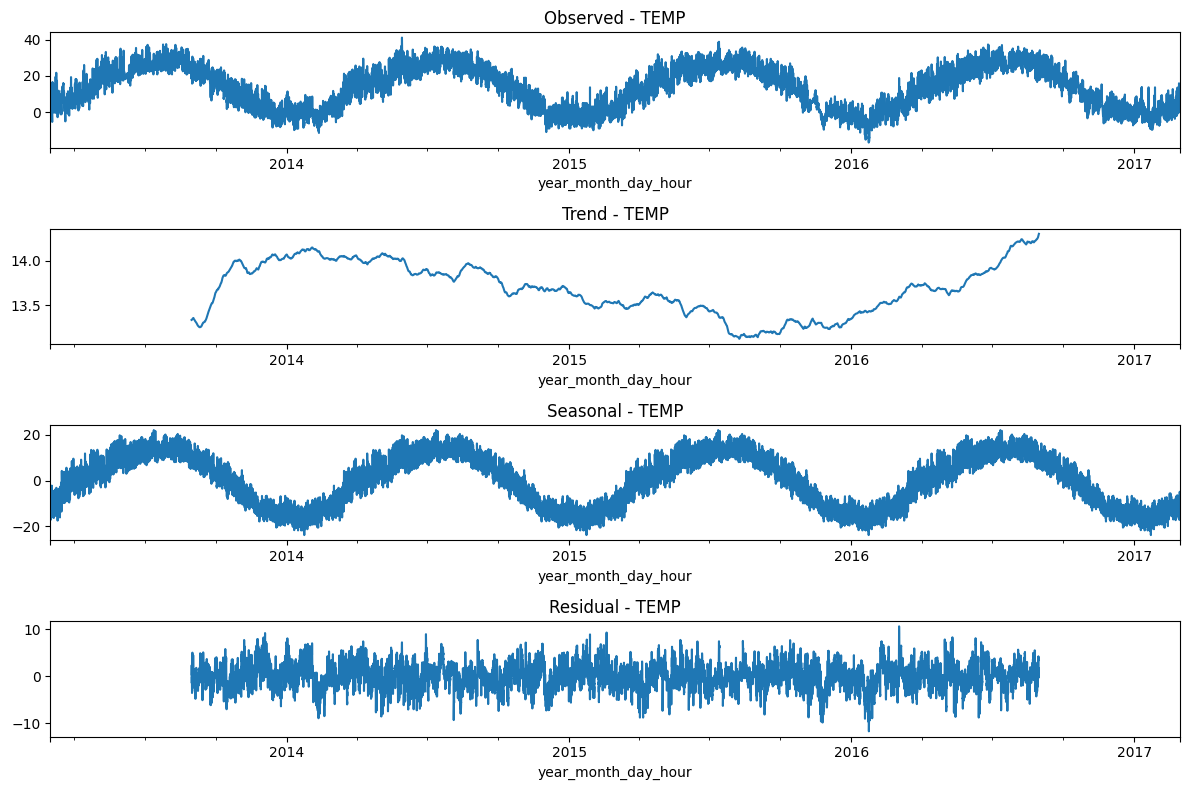

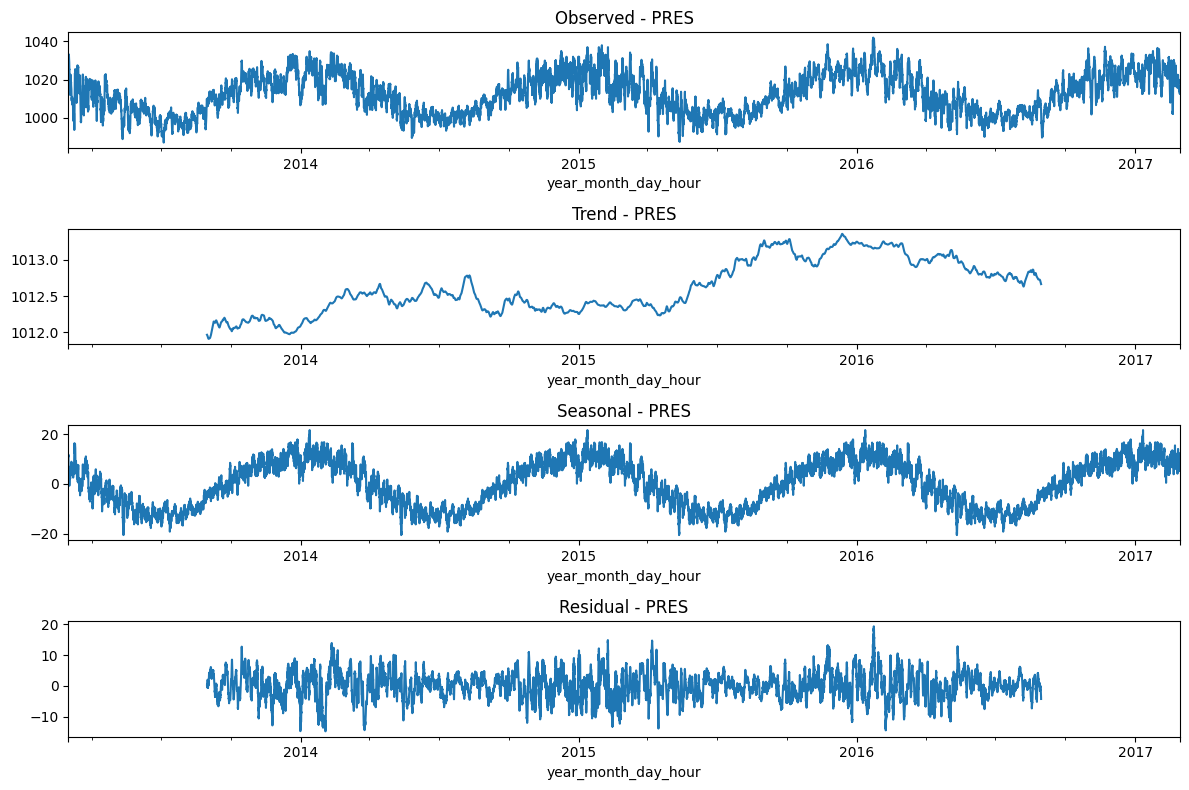

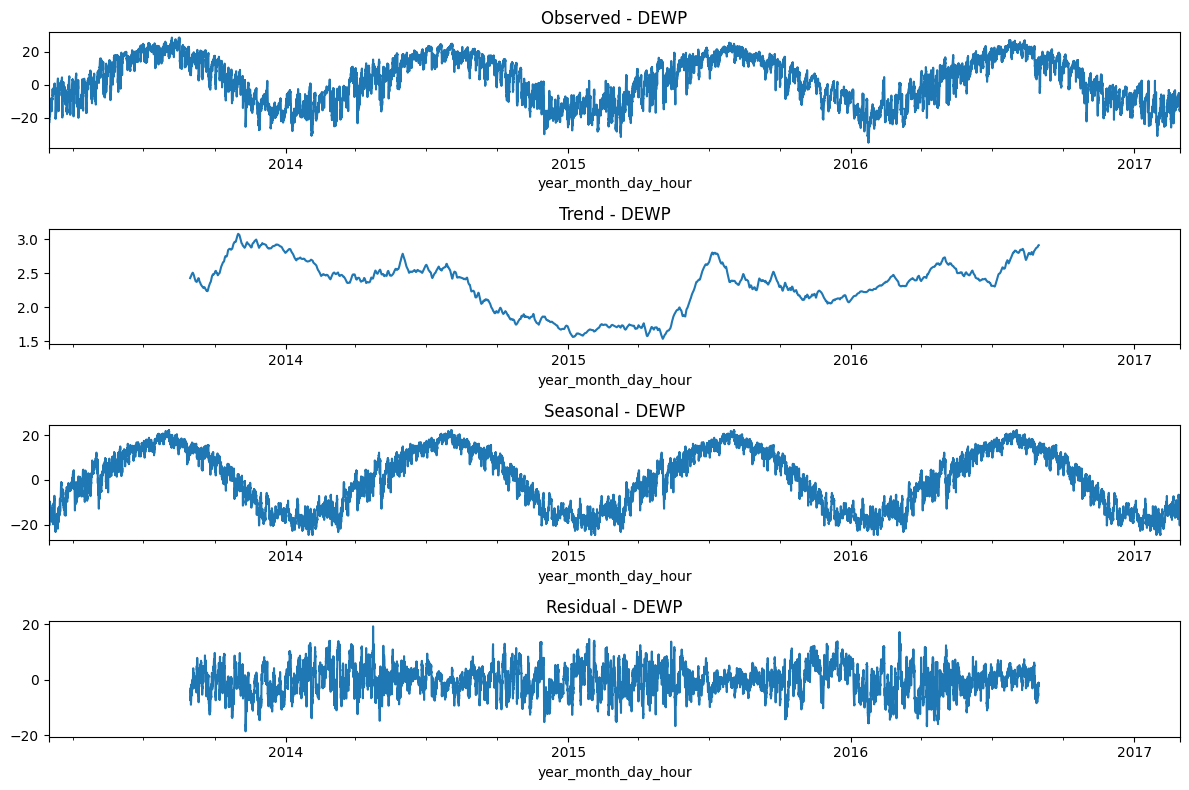

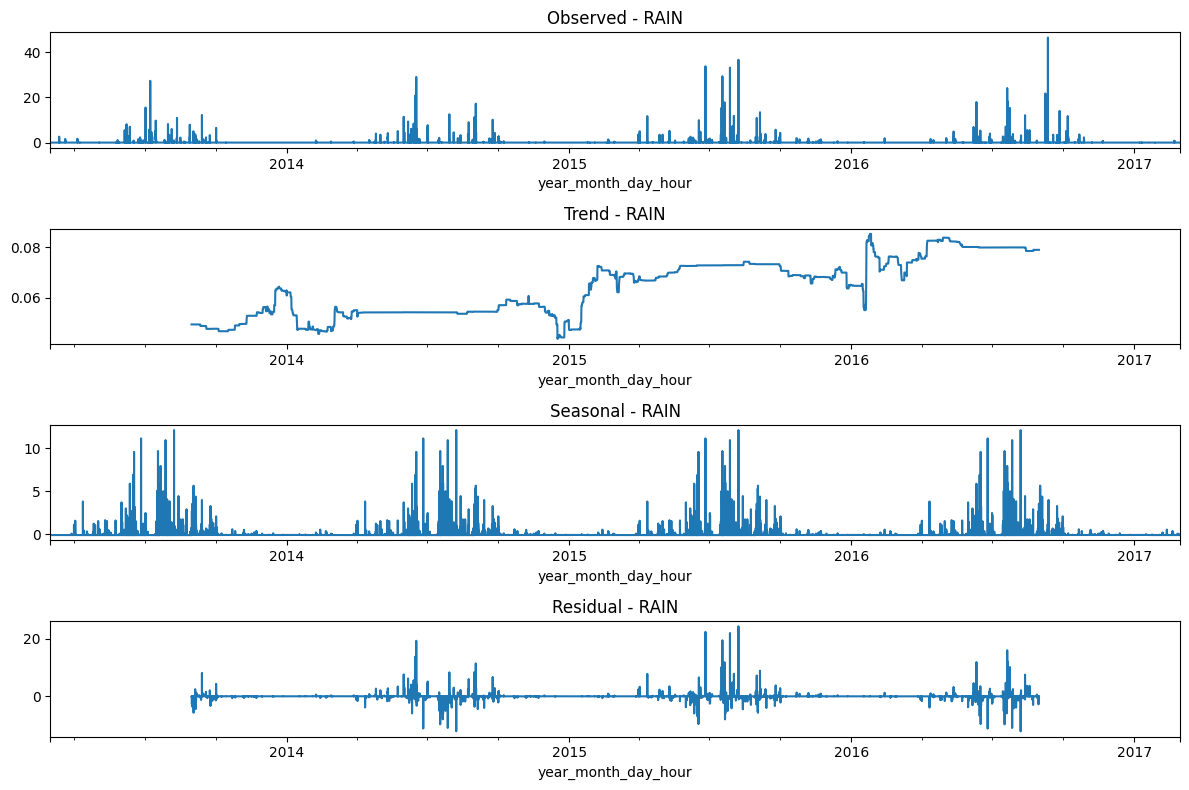

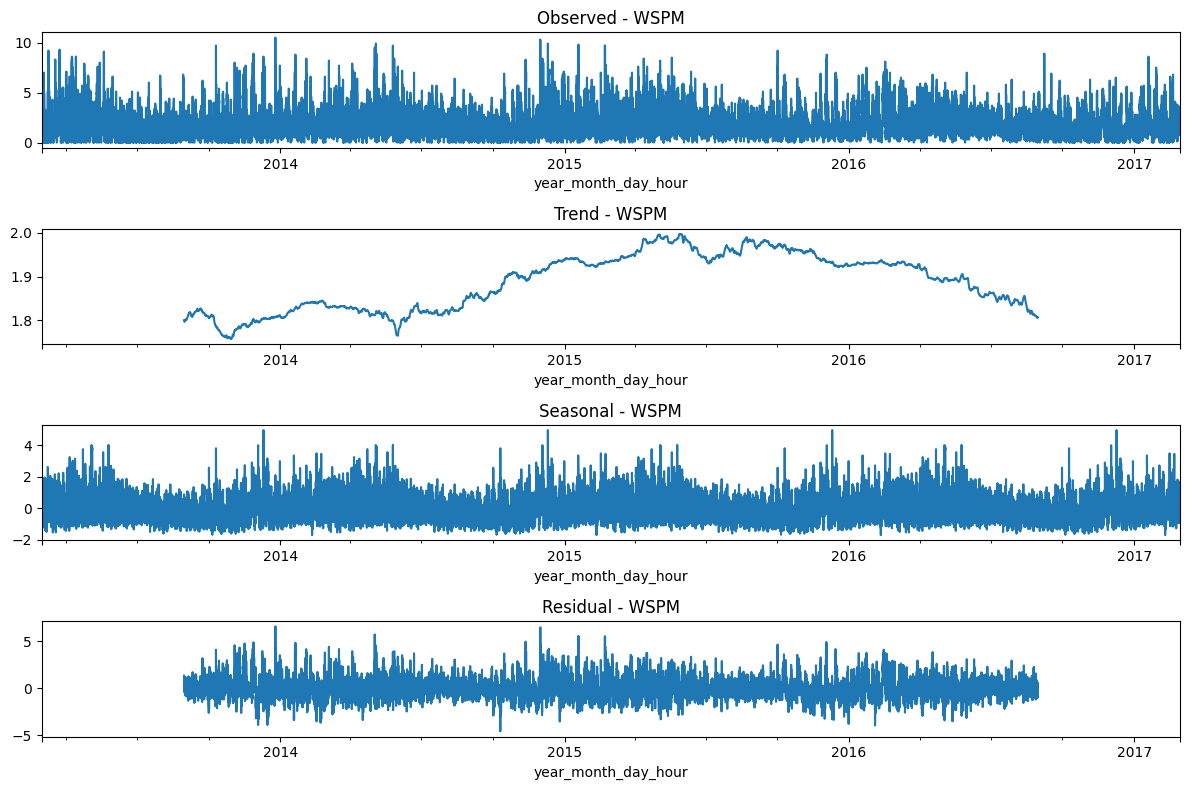

In [ ]:
# YOUR CODE HERE
# With period as 8760

from statsmodels.tsa.seasonal import seasonal_decompose

# Select only the numerical columns for decomposition
numerical_columns = dfAirQualityIndexed.select_dtypes(include=['number']).columns
df_numerical = dfAirQualityIndexed[numerical_columns]

# Loop through each numerical column and perform seasonal decomposition
for column in numerical_columns:
    # Handle missing values (replace with mean for simplicity,
    # consider more sophisticated methods if needed)
    df_numerical[column] = df_numerical[column].fillna(df_numerical[column].mean())

    decomposition = seasonal_decompose(df_numerical[column], model='additive', period = 8760)

    # Plot the decomposed components
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))

    decomposition.observed.plot(ax=ax1, title=f'Observed - {column}')
    decomposition.trend.plot(ax=ax2, title=f'Trend - {column}')
    decomposition.seasonal.plot(ax=ax3, title=f'Seasonal - {column}')
    decomposition.resid.plot(ax=ax4, title=f'Residual - {column}')

    plt.tight_layout()
    plt.show()



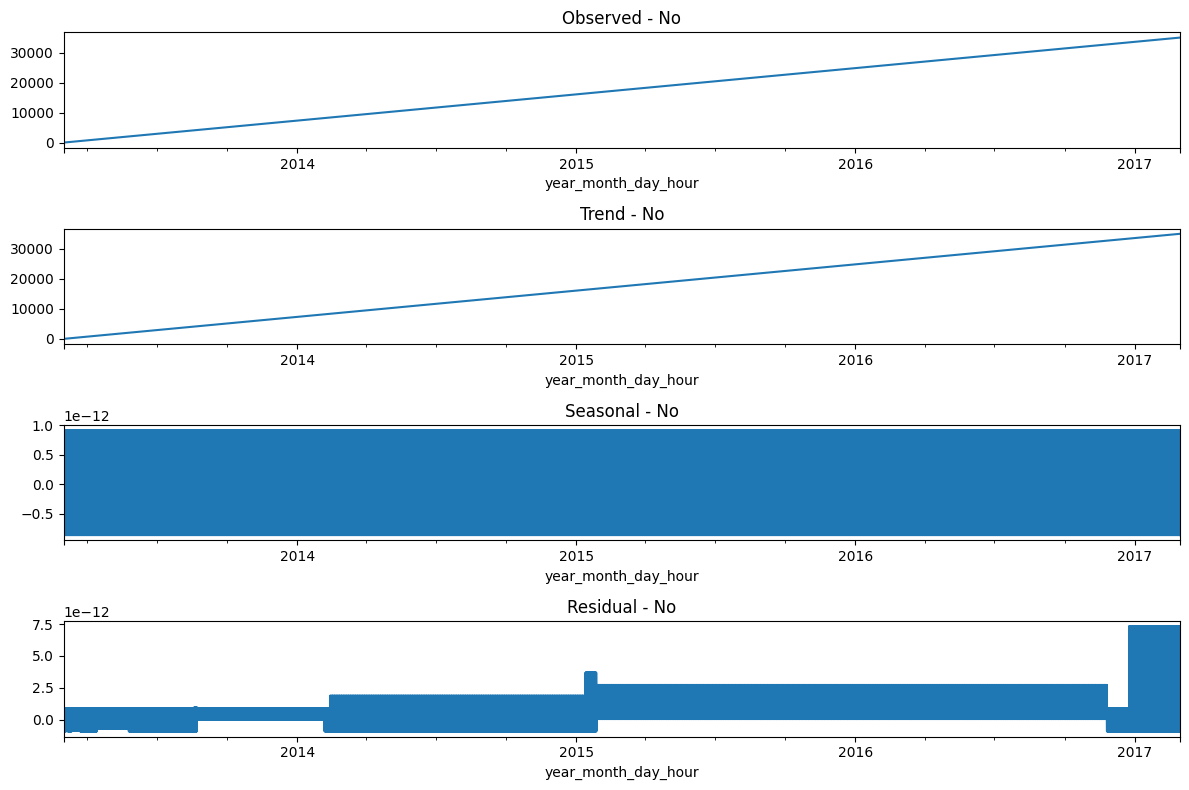

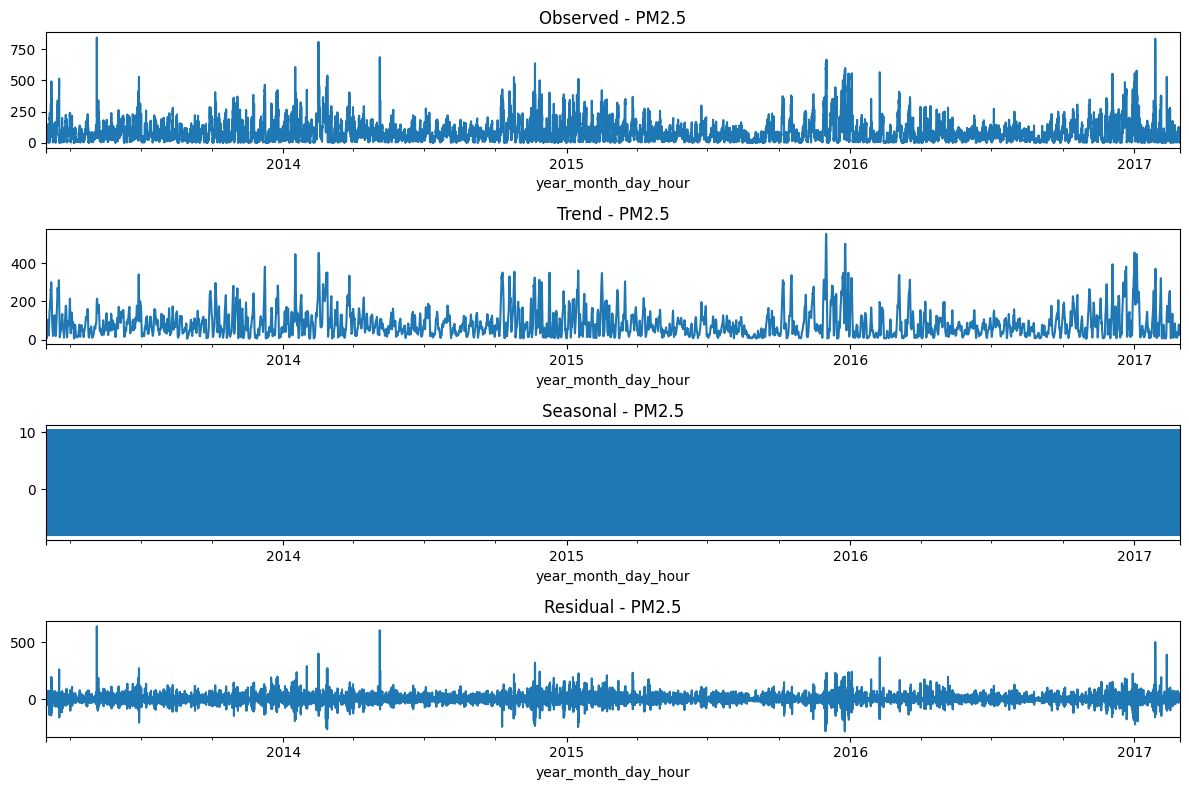

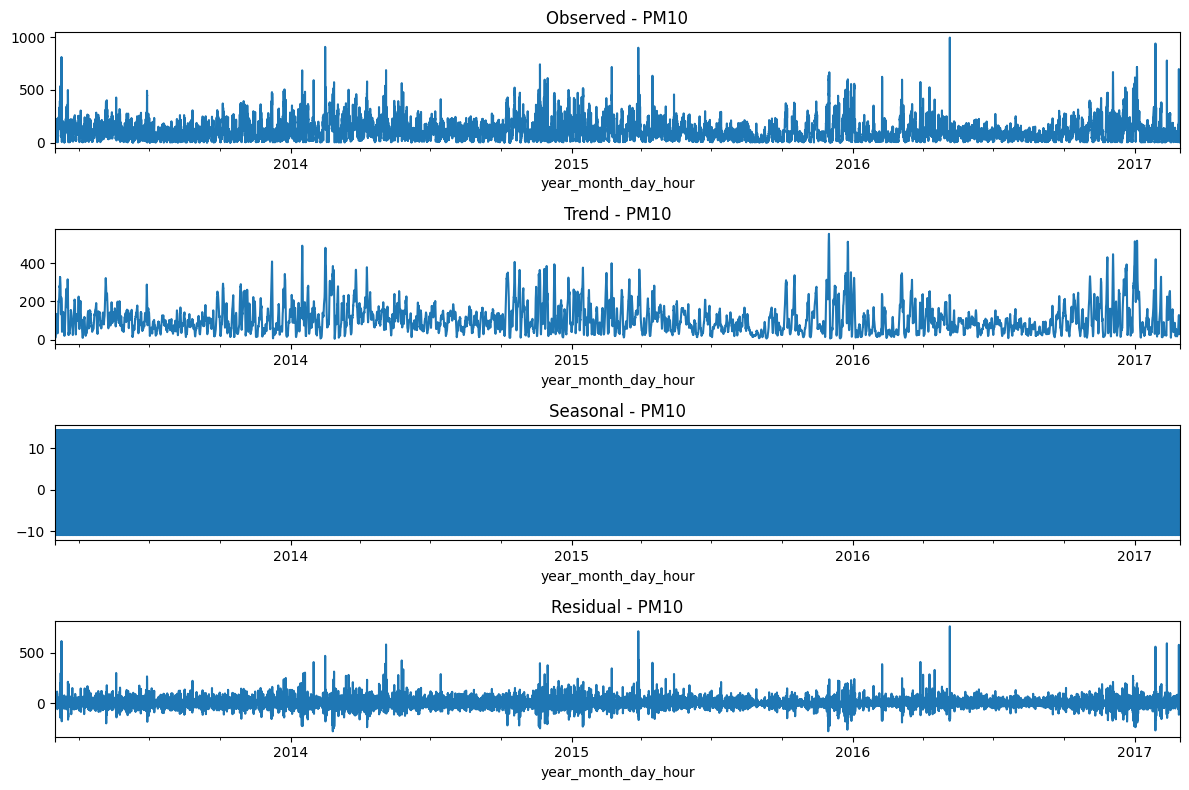

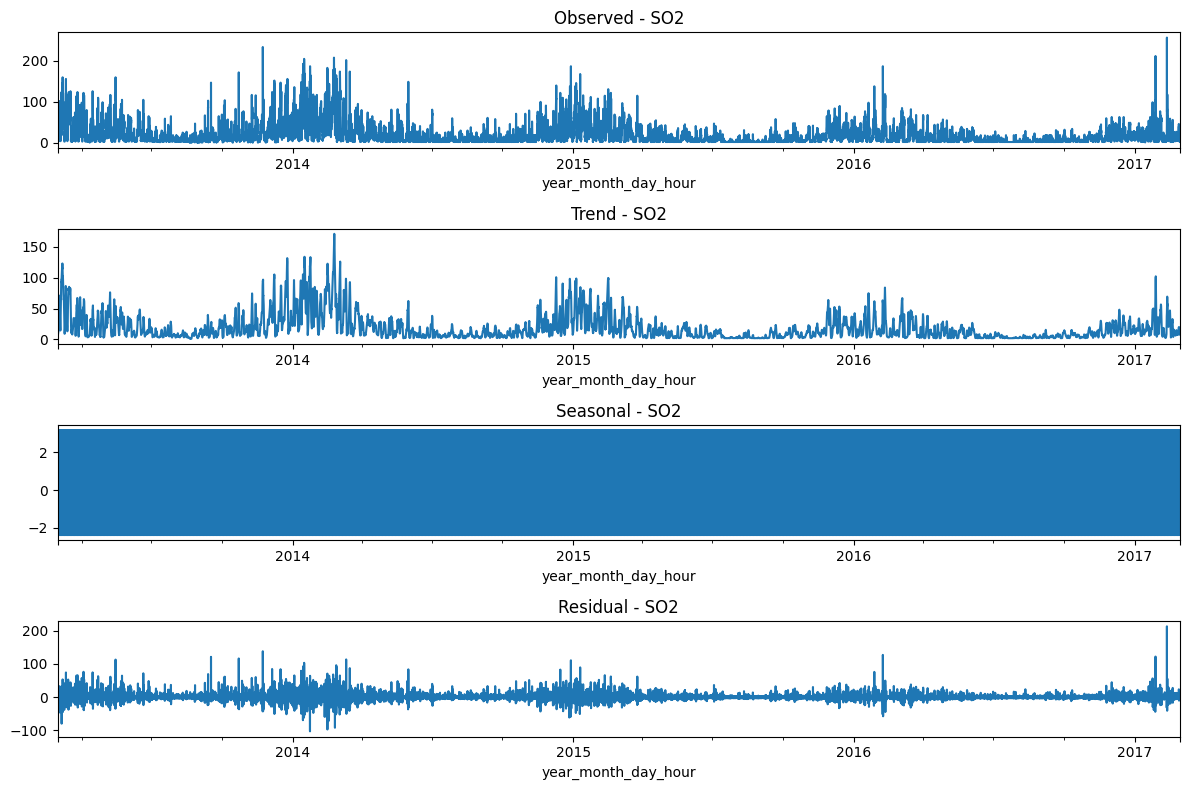

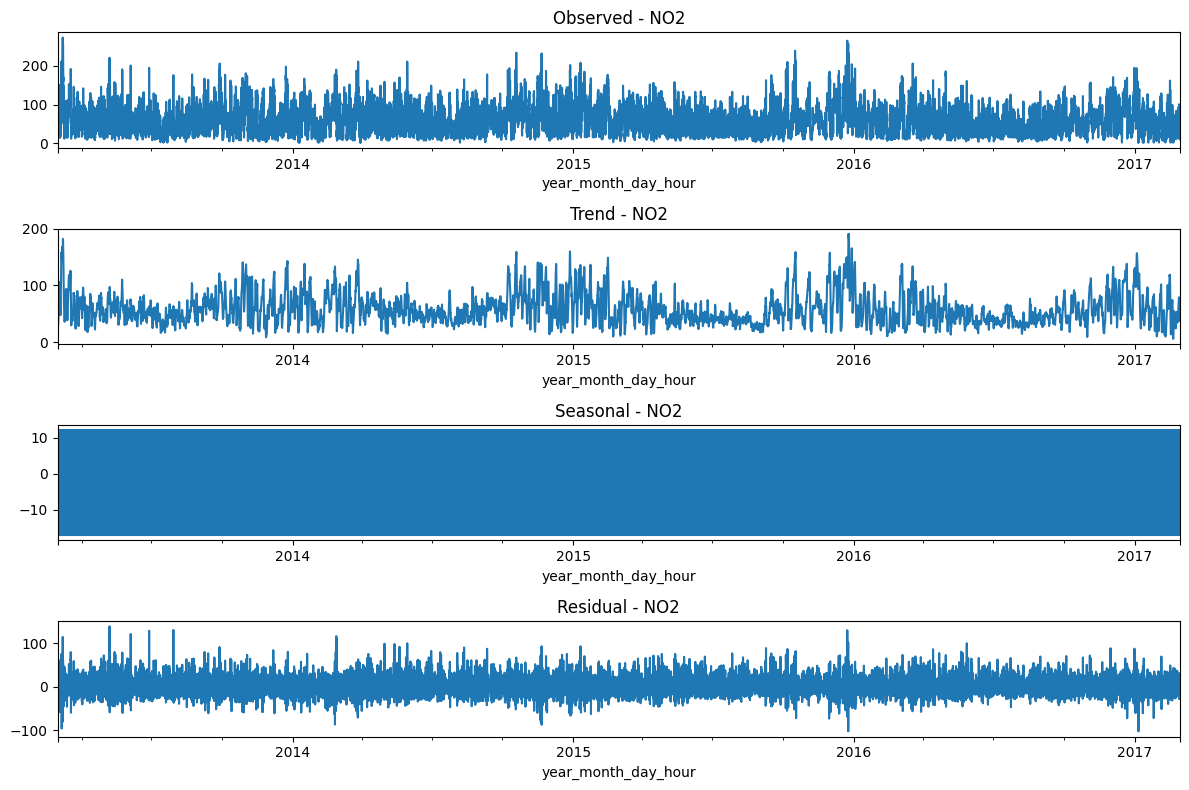

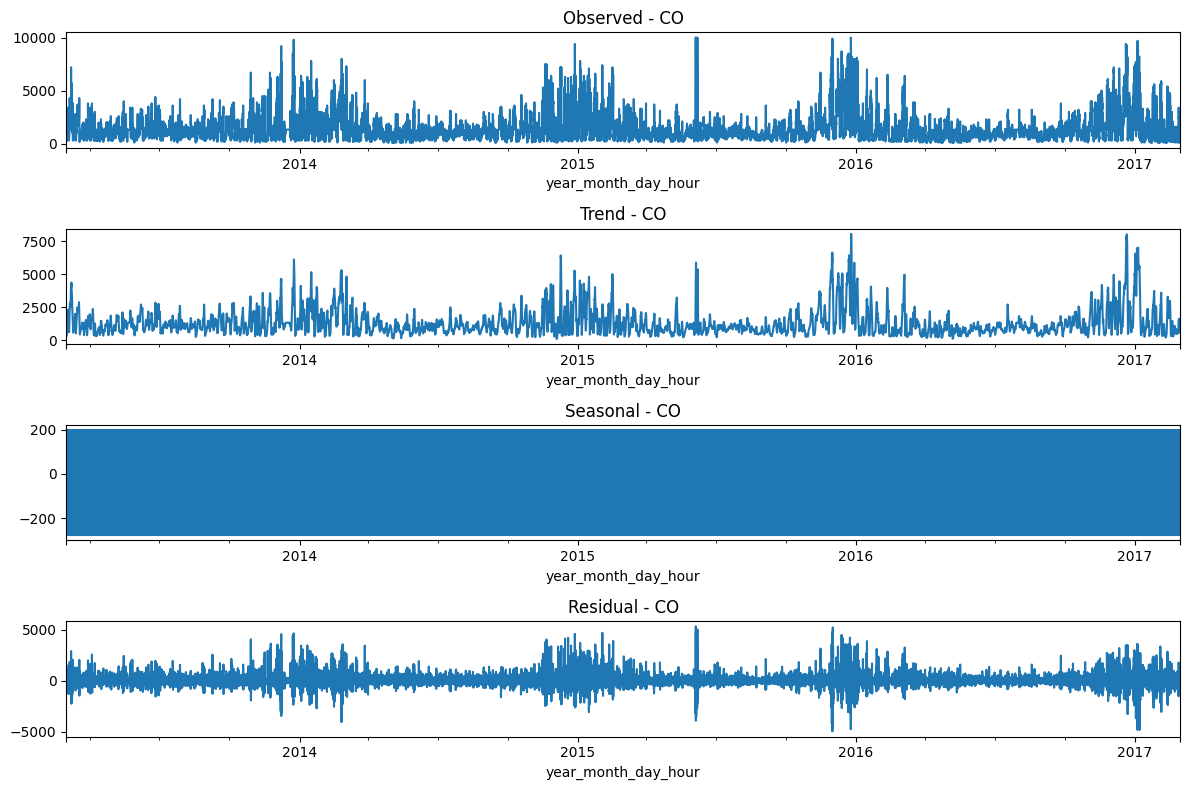

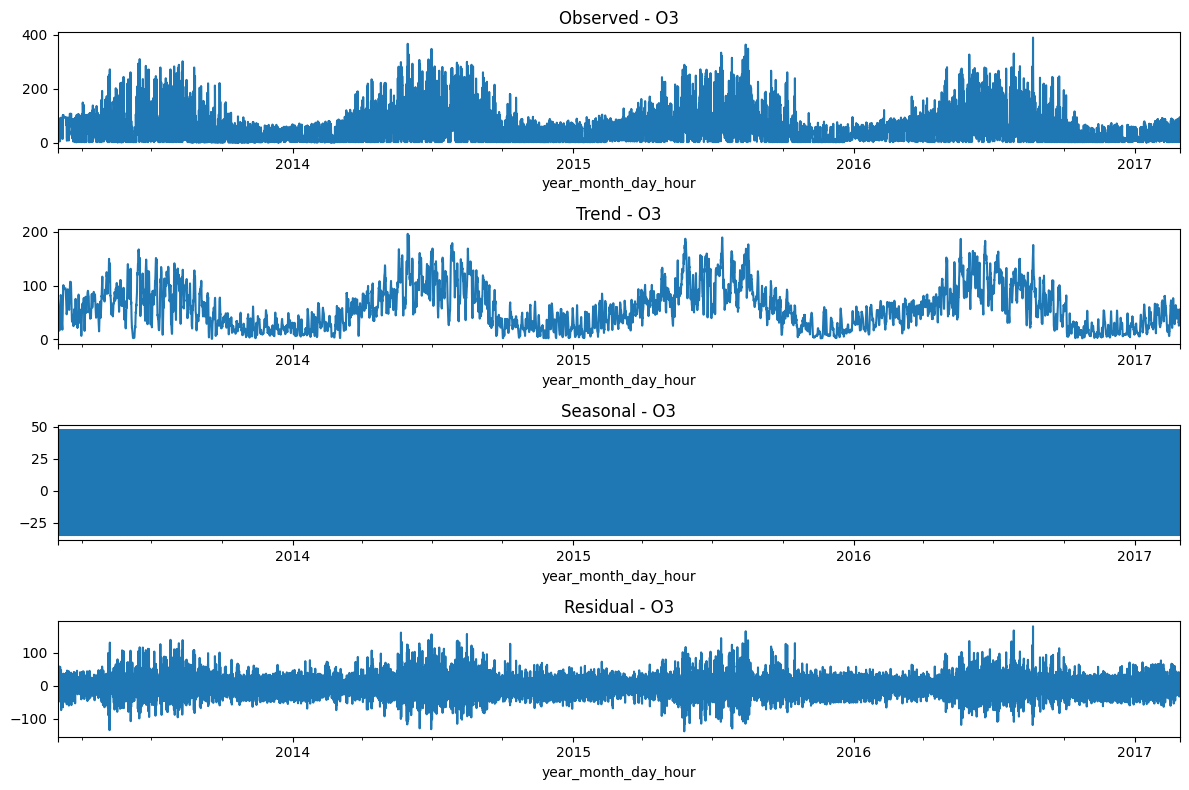

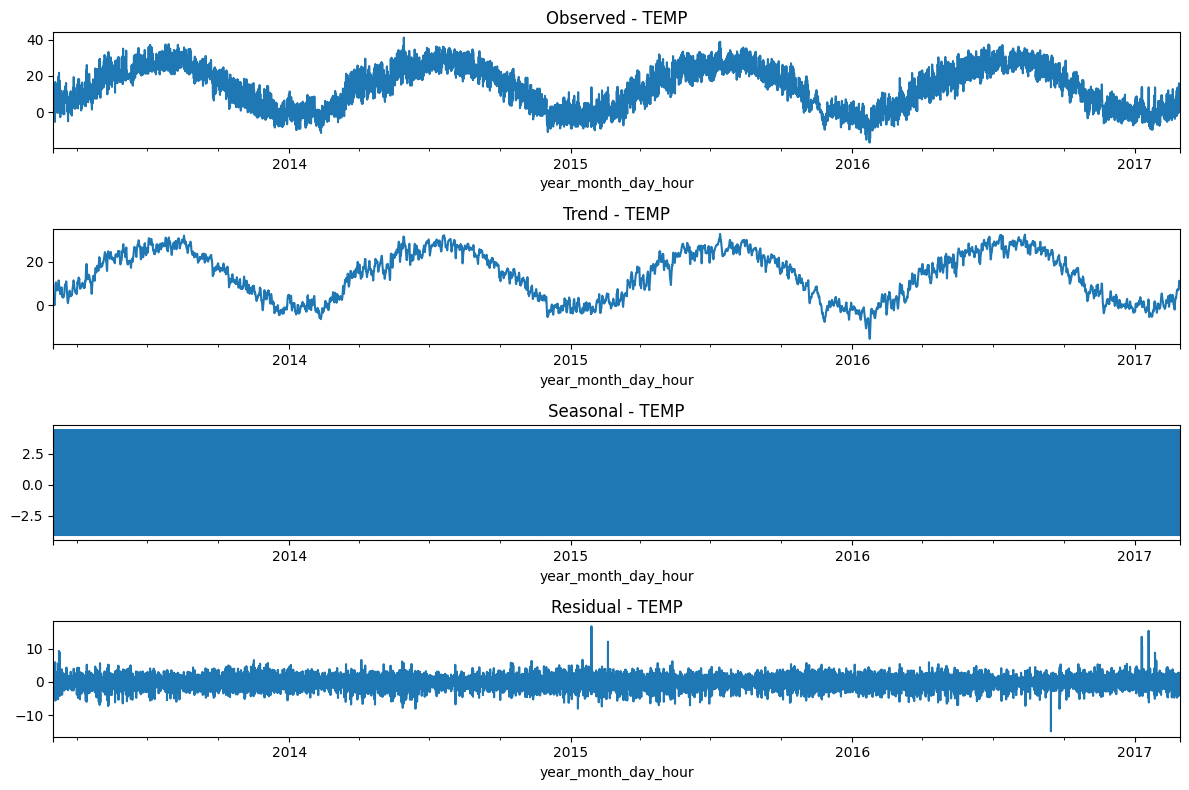

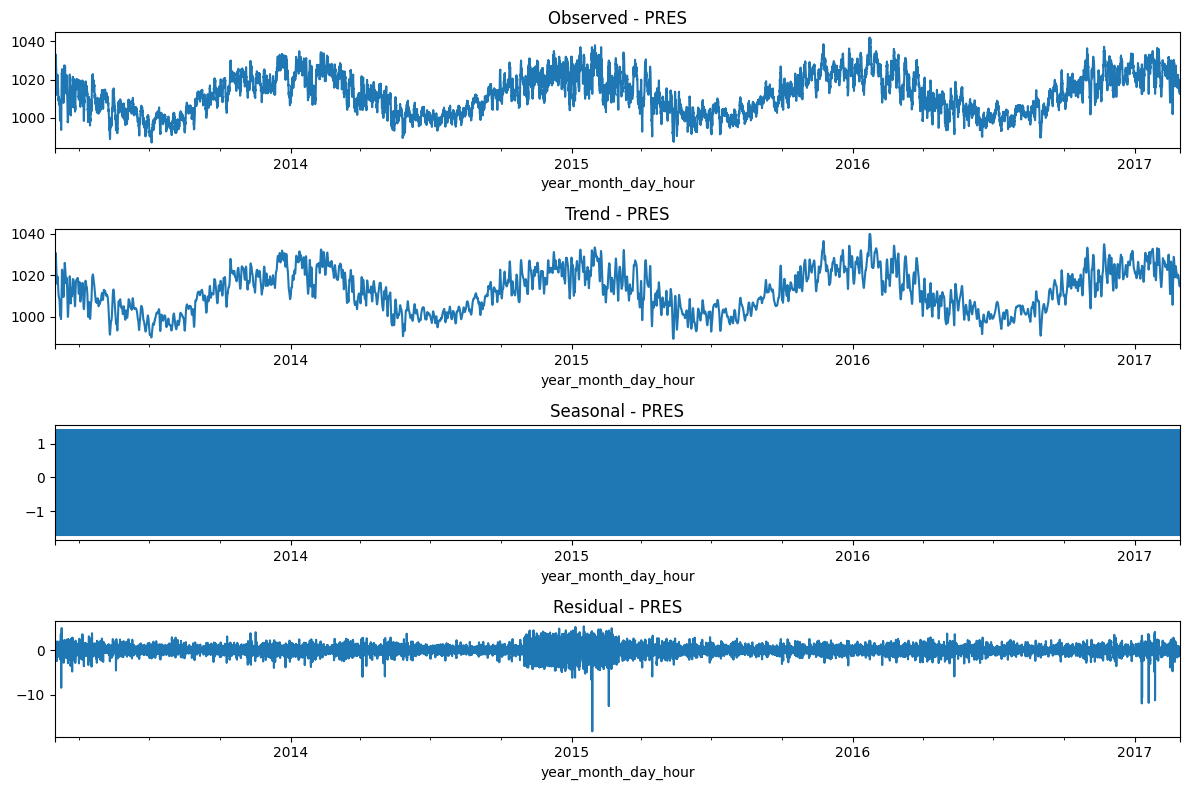

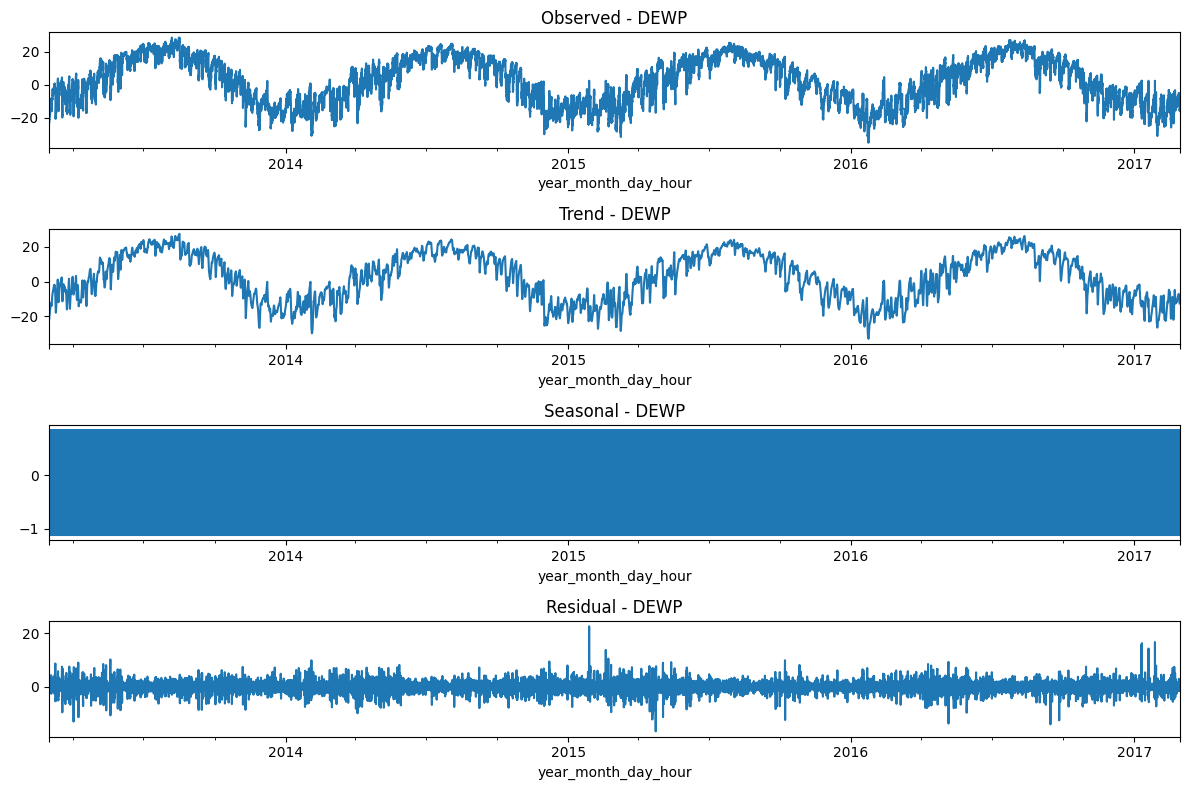

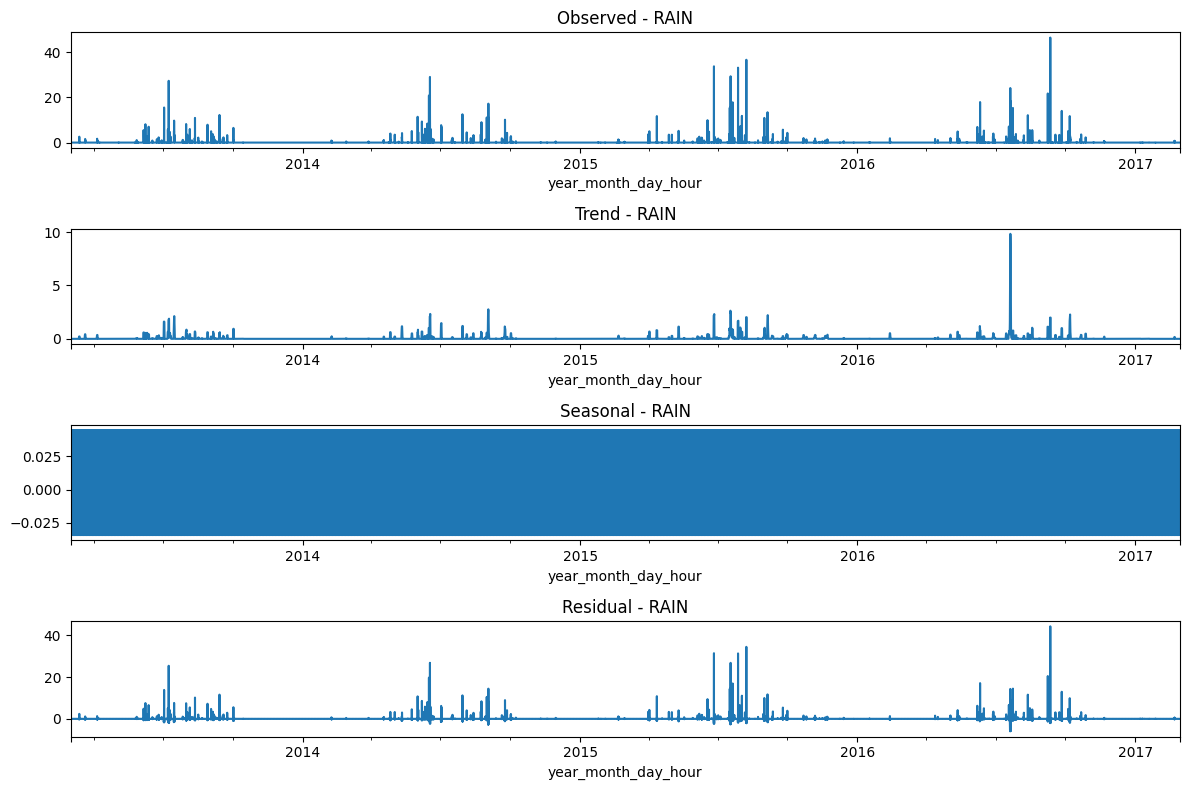

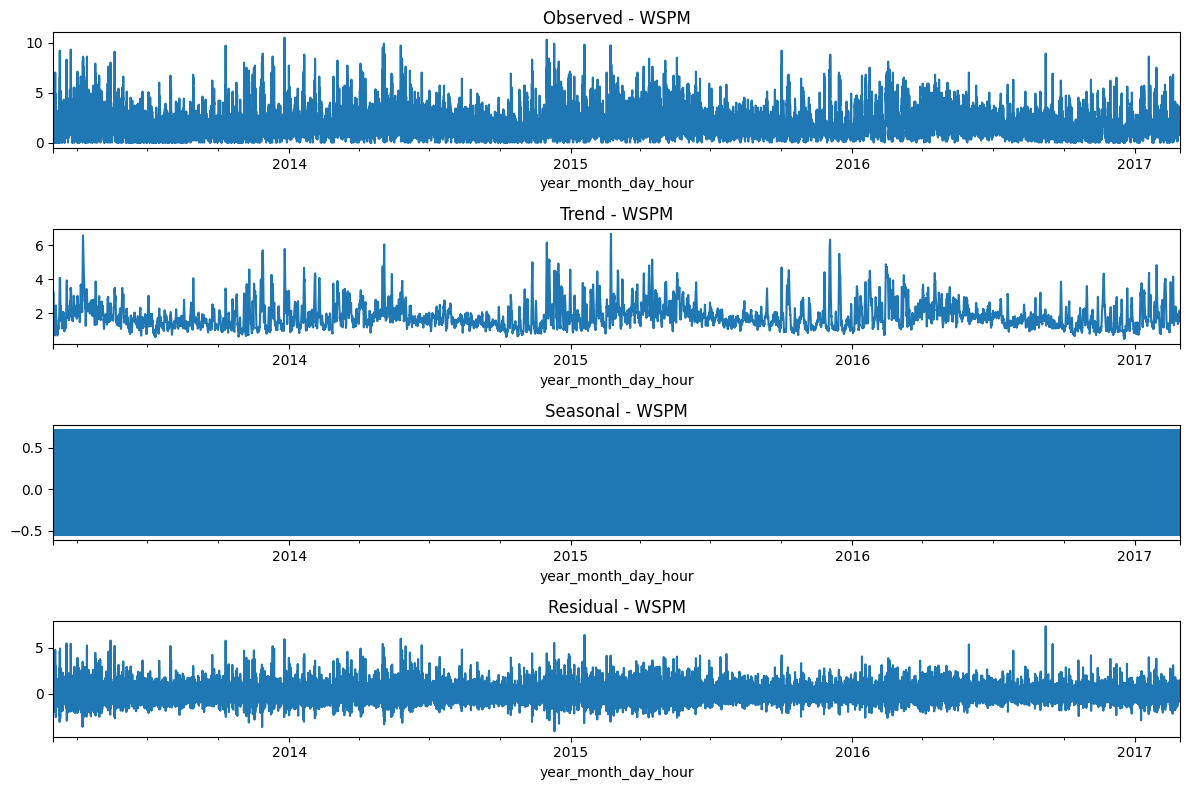

In [ ]:
# YOUR CODE HERE
from statsmodels.tsa.seasonal import seasonal_decompose

# Select only the numerical columns for decomposition
numerical_columns = dfAirQualityIndexed.select_dtypes(include=['number']).columns
df_numerical = dfAirQualityIndexed[numerical_columns]

# Loop through each numerical column and perform seasonal decomposition
for column in numerical_columns:
    # Handle missing values (replace with mean for simplicity,
    # consider more sophisticated methods if needed)
    df_numerical[column] = df_numerical[column].fillna(df_numerical[column].mean())

    decomposition = seasonal_decompose(df_numerical[column], model='additive')

    # Plot the decomposed components
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))

    decomposition.observed.plot(ax=ax1, title=f'Observed - {column}')
    decomposition.trend.plot(ax=ax2, title=f'Trend - {column}')
    decomposition.seasonal.plot(ax=ax3, title=f'Seasonal - {column}')
    decomposition.resid.plot(ax=ax4, title=f'Residual - {column}')

    plt.tight_layout()
    plt.show()



### Time Series Stationarity (2 Points)

Check the Stationarity of time series using:
  * Dickey Fuller test
  * Rolling mean and Rolling standard deviation

Make the timeseries stationary

* Apply Log transformation and **Differencing** of the timeseries to make it stationary

Verify the stationarity with the Dickey Fuller test

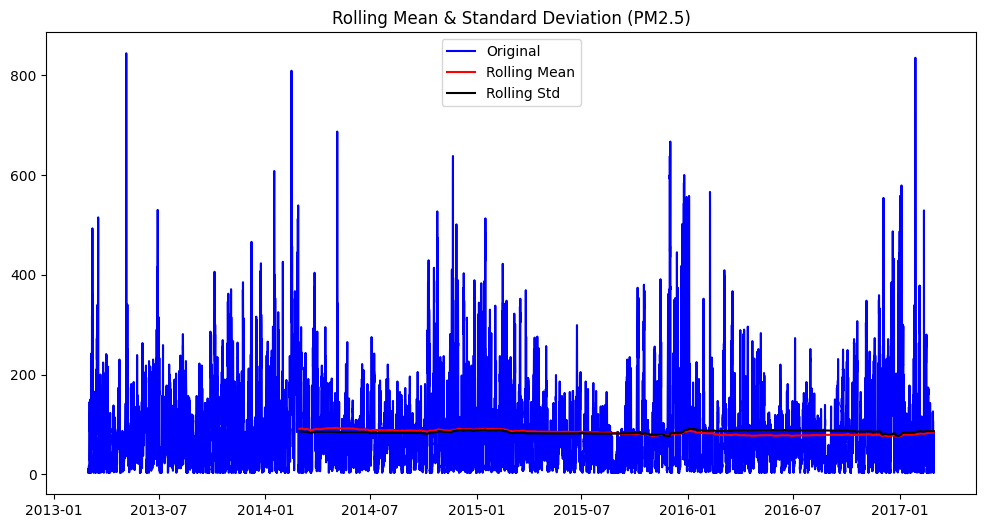

Results of Dickey-Fuller Test for PM2.5:
ADF Statistic: -19.19639687178758
p-value: 0.0
Critical Values:
   1%: -3.4305367654628065
   5%: -2.861622545720494
   10%: -2.566813936492474
The time series for PM2.5 is stationary (reject the null hypothesis).



In [ ]:
# YOUR CODE HERE
# Plotting for PM2.5 only

from statsmodels.tsa.stattools import adfuller

# Calculate rolling statistics
rolling_mean = df_numerical['PM2.5'].rolling(window=8760).mean()
rolling_std = df_numerical['PM2.5'].rolling(window=8760).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(df_numerical['PM2.5'], label='Original', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='black')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (PM2.5)')
plt.show()

# Perform Dickey-Fuller test for each column individually
for column in df_numerical.columns:
    if column == 'PM2.5':
        result = adfuller(df_numerical[column])

        print(f'Results of Dickey-Fuller Test for {column}:')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print('Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')

        if result[1] < 0.05:
            print(f"The time series for {column} is stationary (reject the null hypothesis).\n")
        else:
            print(f"The time series for {column} is not stationary (fail to reject the null hypothesis).\n")

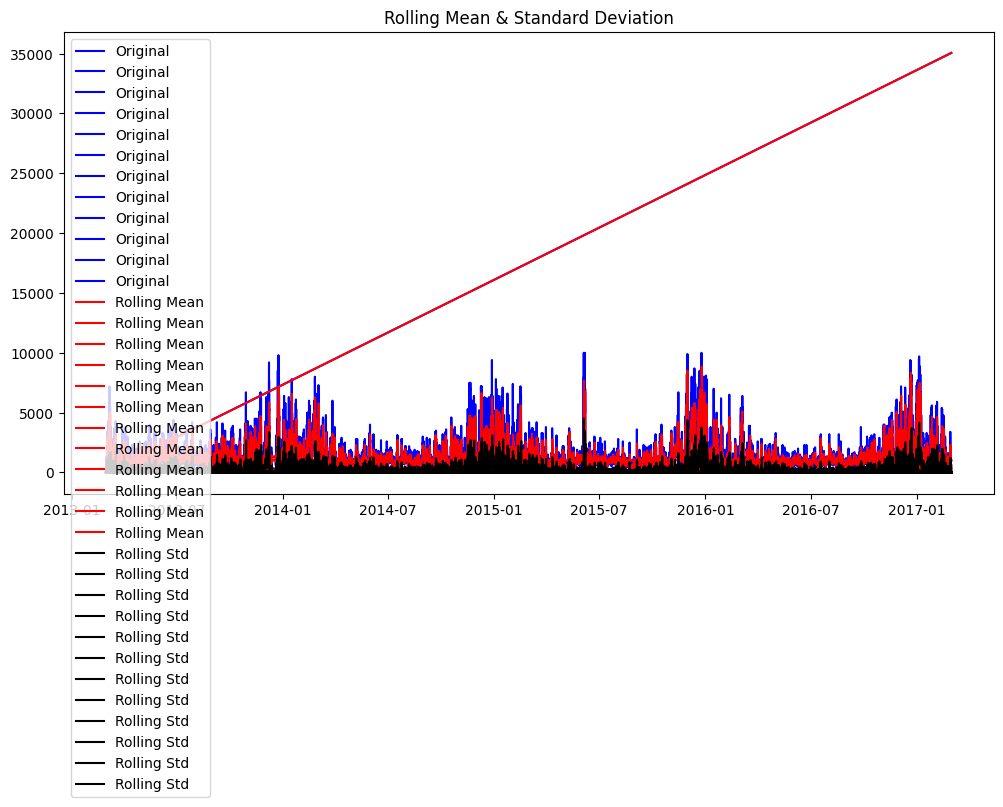

Results of Dickey-Fuller Test for No:
ADF Statistic: -127.69450155662084
p-value: 0.0
Critical Values:
   1%: -3.4305365416986473
   5%: -2.8616224468253715
   10%: -2.566813883853168
The time series for No is stationary (reject the null hypothesis).

Results of Dickey-Fuller Test for PM2.5:
ADF Statistic: -19.19639687178758
p-value: 0.0
Critical Values:
   1%: -3.4305367654628065
   5%: -2.861622545720494
   10%: -2.566813936492474
The time series for PM2.5 is stationary (reject the null hypothesis).

Results of Dickey-Fuller Test for PM10:
ADF Statistic: -19.28717855409656
p-value: 0.0
Critical Values:
   1%: -3.4305367707970675
   5%: -2.8616225480780315
   10%: -2.5668139377473302
The time series for PM10 is stationary (reject the null hypothesis).

Results of Dickey-Fuller Test for SO2:
ADF Statistic: -14.147449533092379
p-value: 2.1915075162068234e-26
Critical Values:
   1%: -3.43053679213716
   5%: -2.8616225575095284
   10%: -2.566813942767471
The time series for SO2 is station

In [ ]:
# YOUR CODE HERE

from statsmodels.tsa.stattools import adfuller

# Calculate rolling statistics
rolling_mean = df_numerical.rolling(window=12).mean()
rolling_std = df_numerical.rolling(window=12).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(df_numerical, label='Original', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='black')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

# Perform Dickey-Fuller test for each column individually
for column in df_numerical.columns:
    result = adfuller(df_numerical[column])

    print(f'Results of Dickey-Fuller Test for {column}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

    if result[1] < 0.05:
        print(f"The time series for {column} is stationary (reject the null hypothesis).\n")
    else:
        print(f"The time series for {column} is not stationary (fail to reject the null hypothesis).\n")


### Auto Correlation Plot Analysis ( 2 Points)

Autocorrelation refers to the degree of correlation between the values of the same variables across different observations in the data.  The concept of autocorrelation is most often discussed in the context of time series data in which observations occur at different points in time (e.g.,temperature measured on different days of the month, hours of the day).  For example, one might expect the air temperature on the $1^{st}$ day of the month to be more similar to the temperature on the $2^{nd}$ day compared to the $31^{st}$ day.  If the temperature values that occurred closer together in time are, in fact, more similar than the temperature values that occurred farther apart in time, the data would be autocorrelated.

Autocorrelation can cause problems in conventional analyses (such as ordinary least squares regression) that assume independence of observations.

In a regression analysis, autocorrelation of the regression residuals can also occur if the model is incorrectly specified.  For example, if you are attempting to model a simple linear relationship but the observed relationship is non-linear (i.e., it follows a curved or U-shaped function), then the residuals will be autocorrelated.

* Plot ACF and PACF graphs
* Analyse and identify the ARIMA (p, d, q) terms

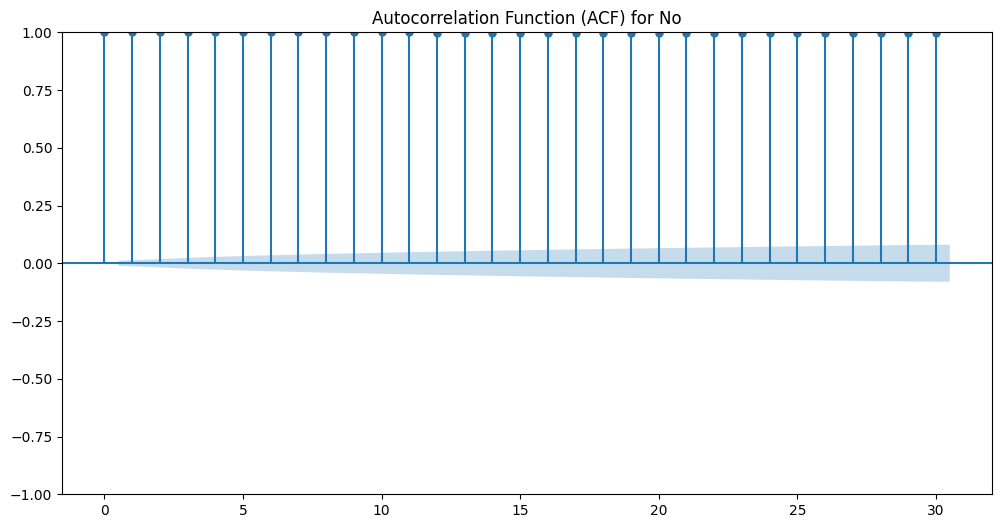

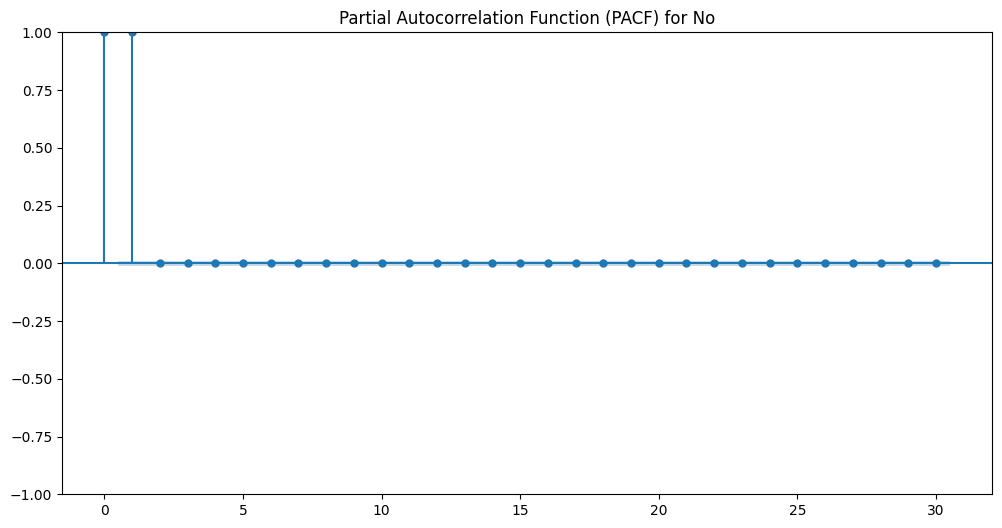

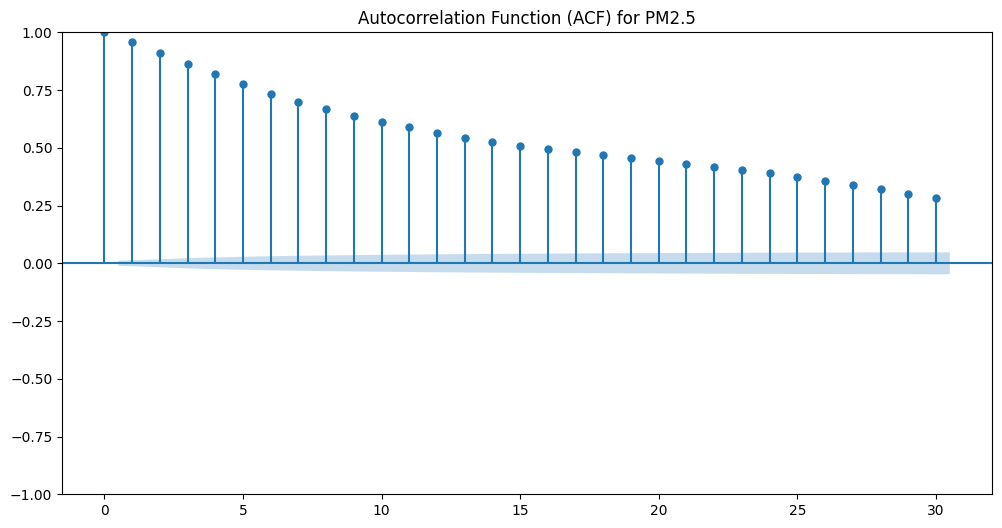

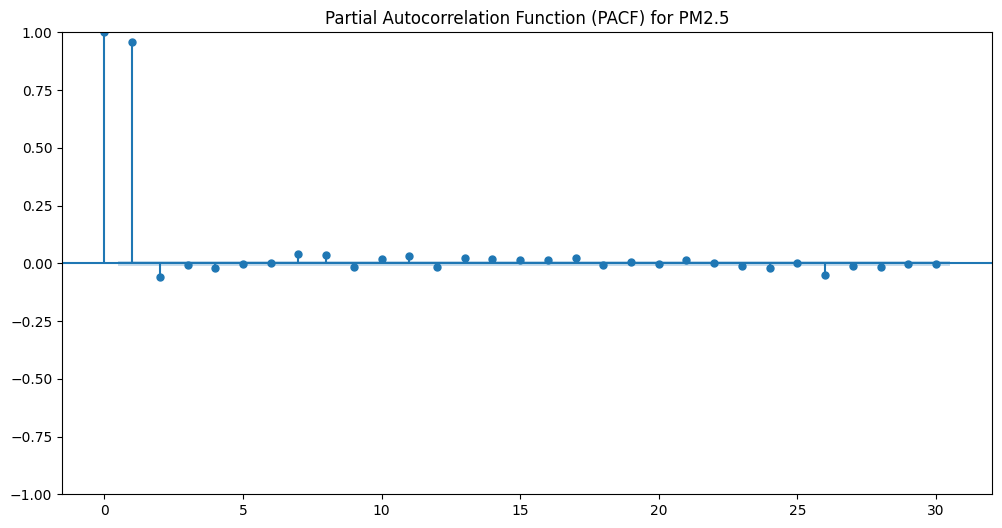

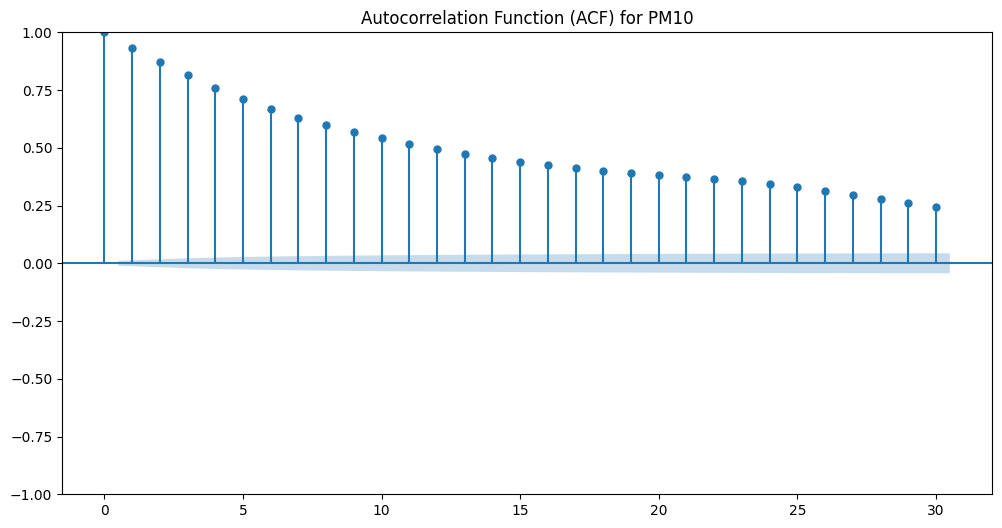

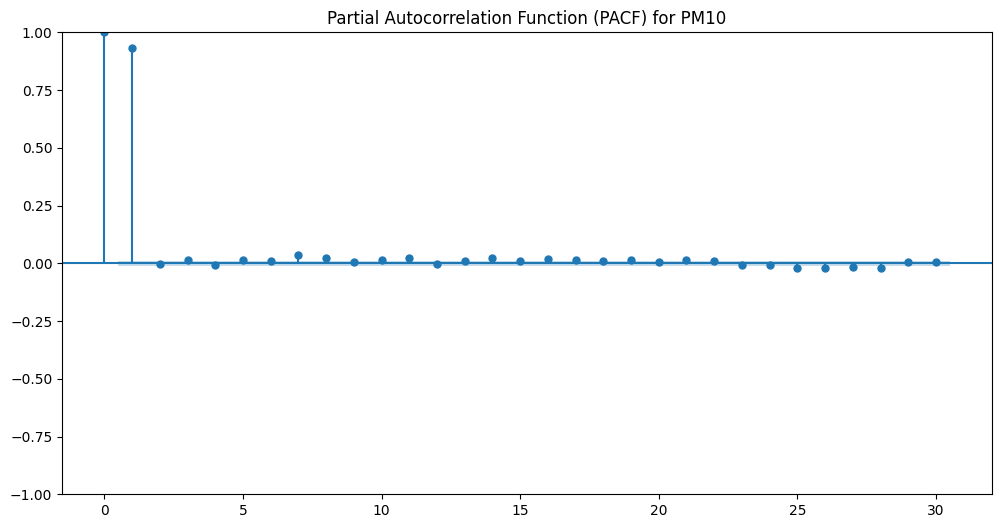

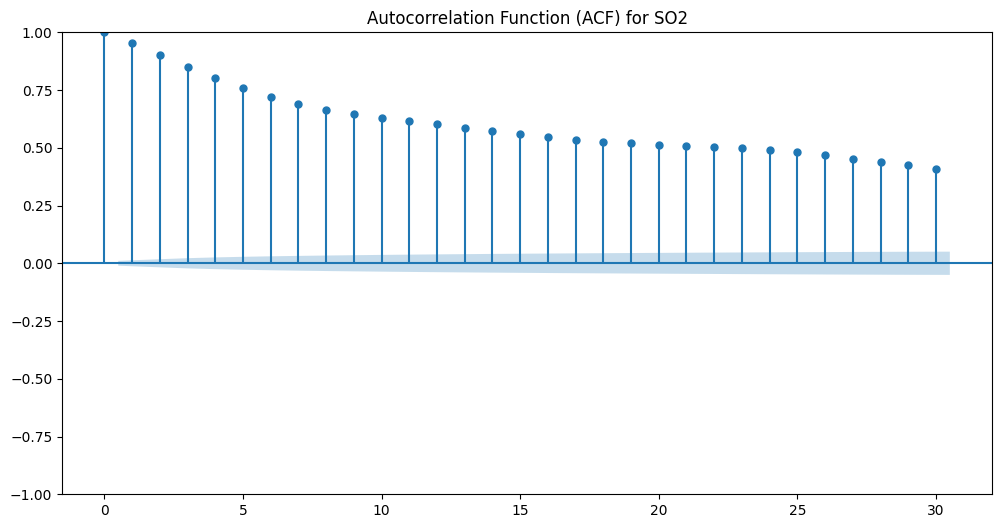

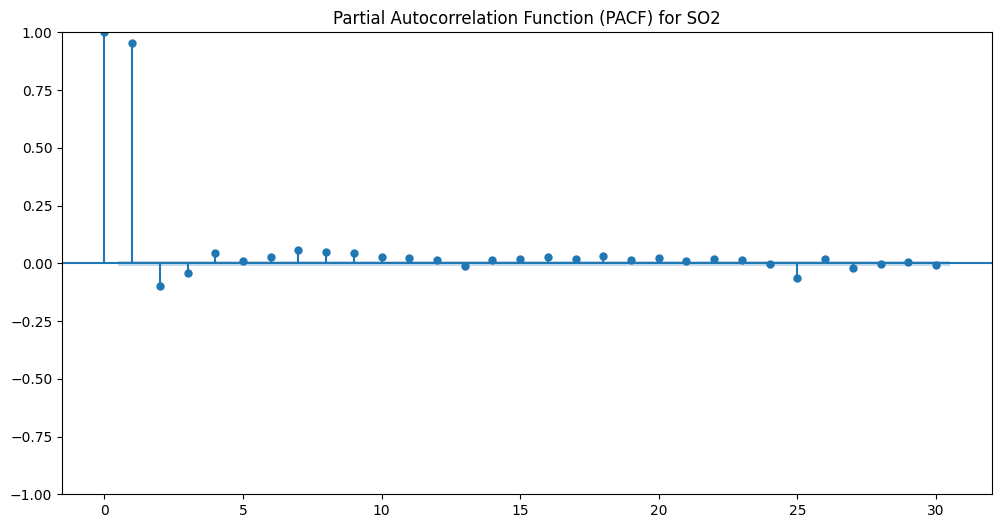

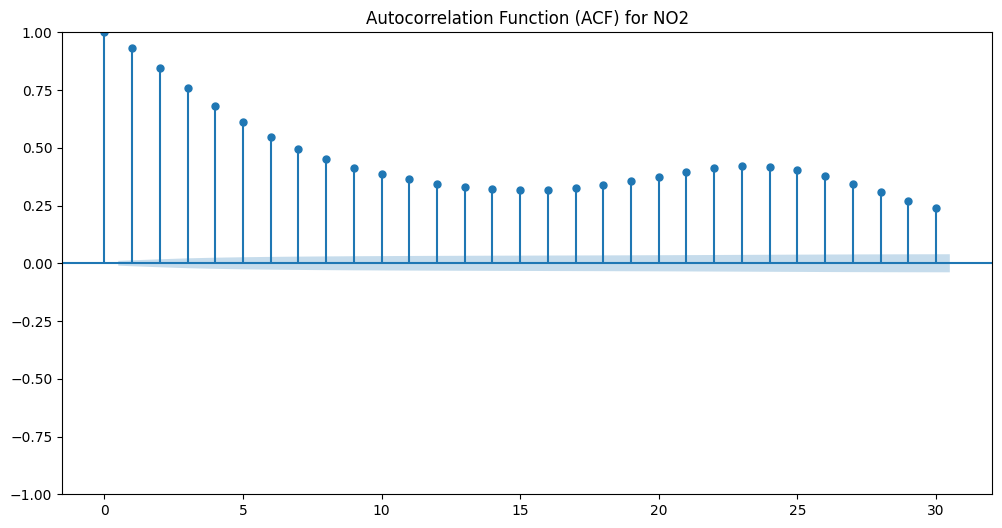

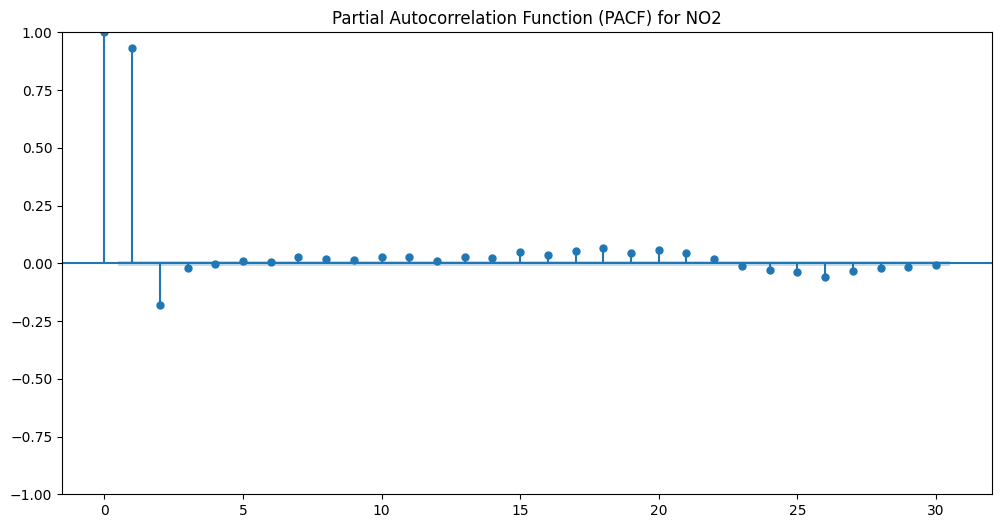

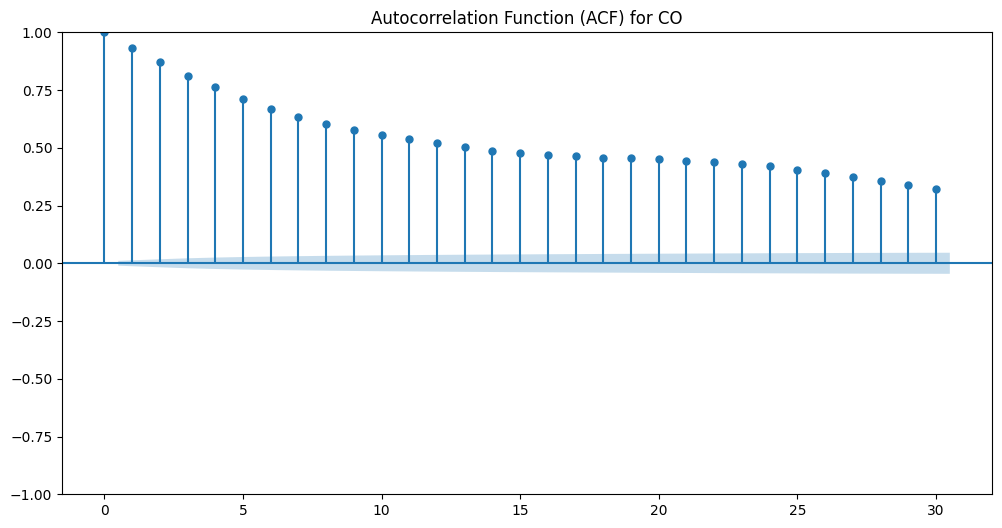

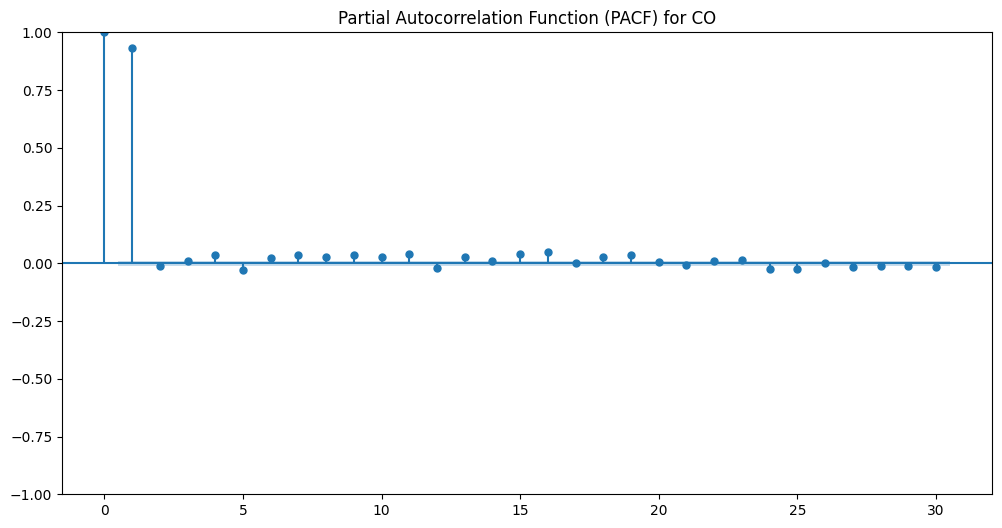

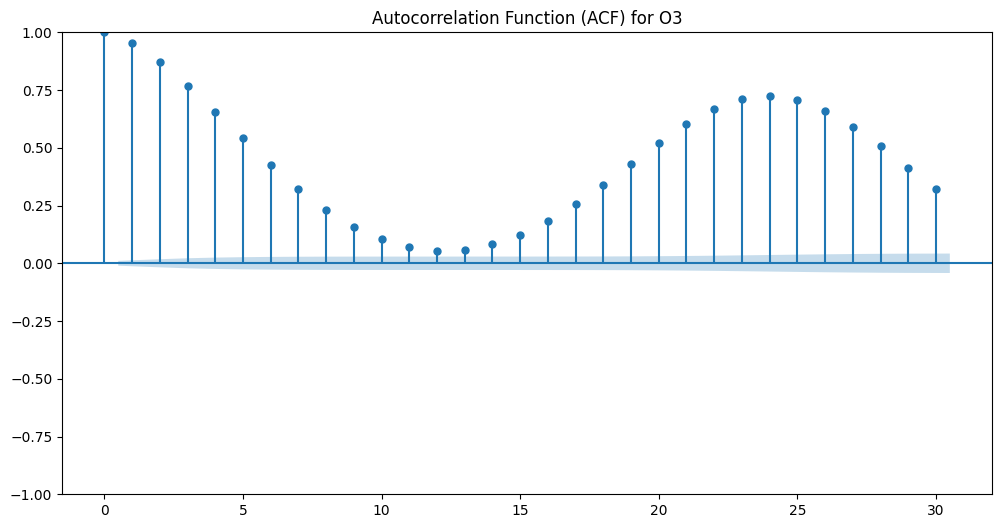

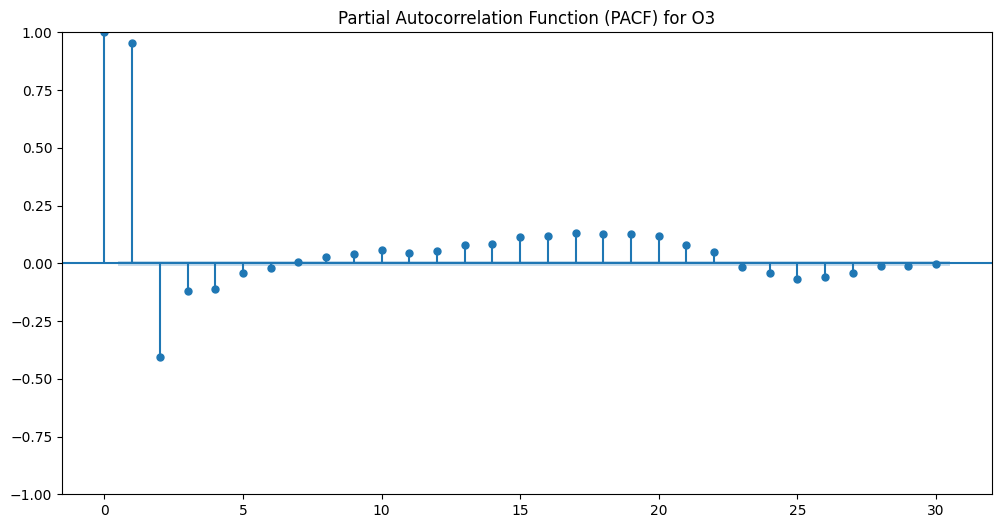

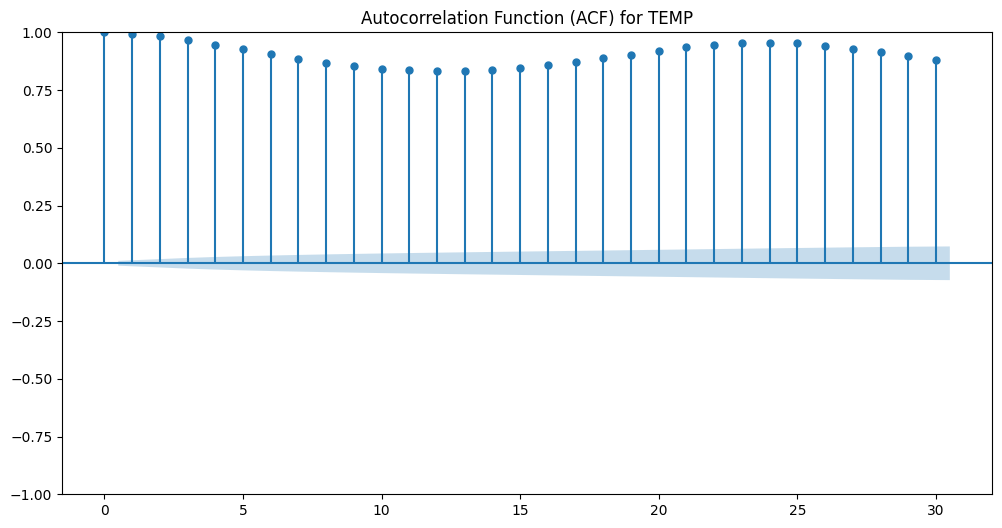

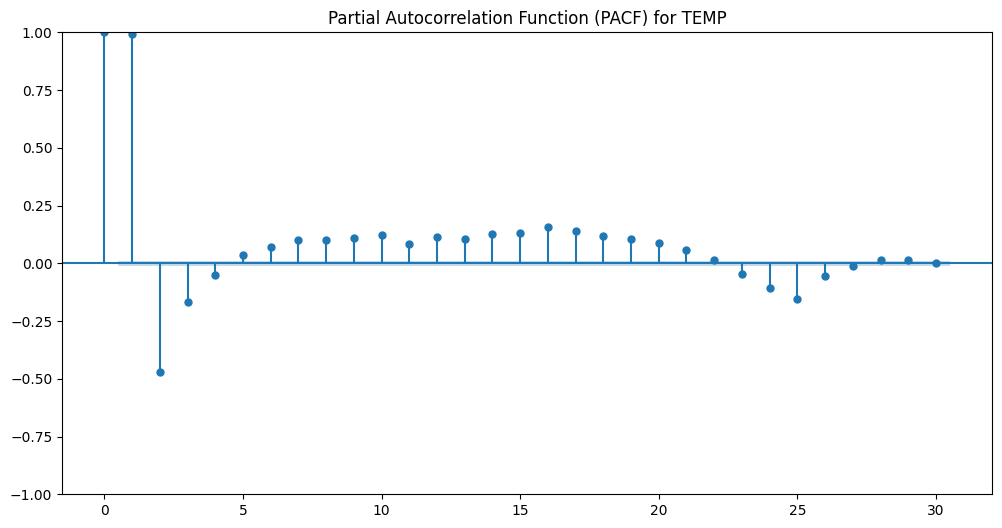

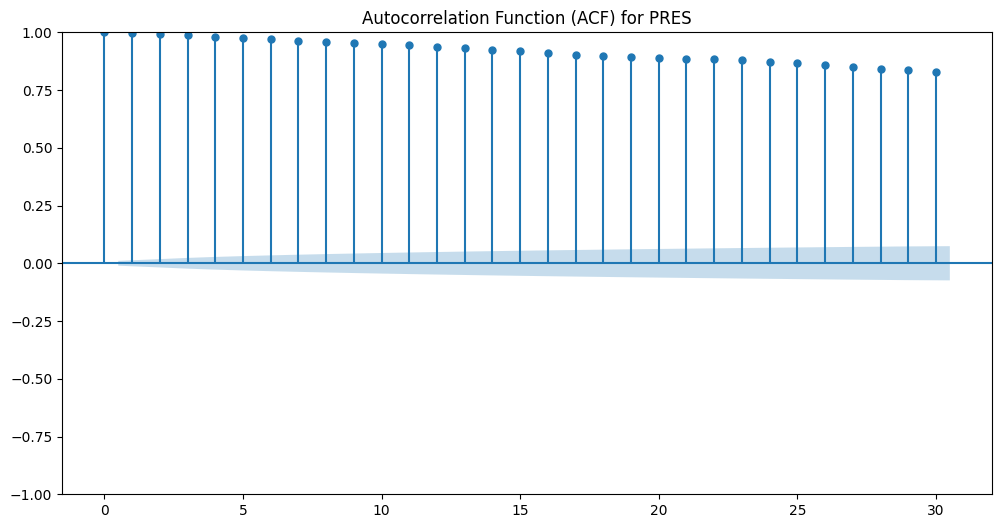

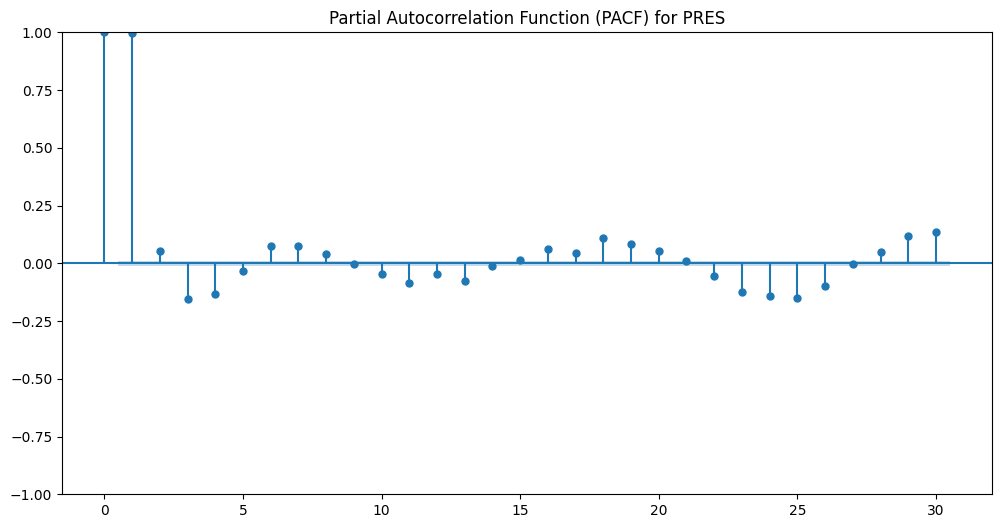

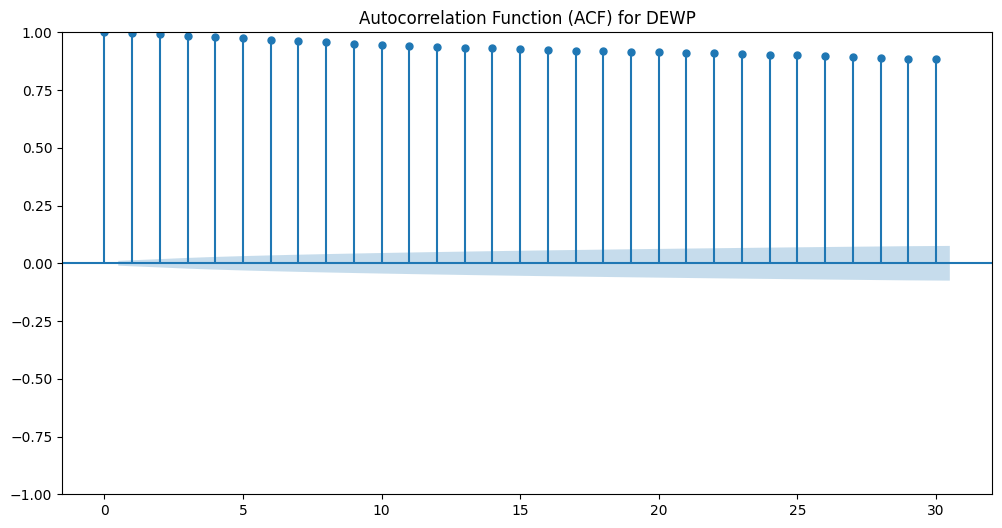

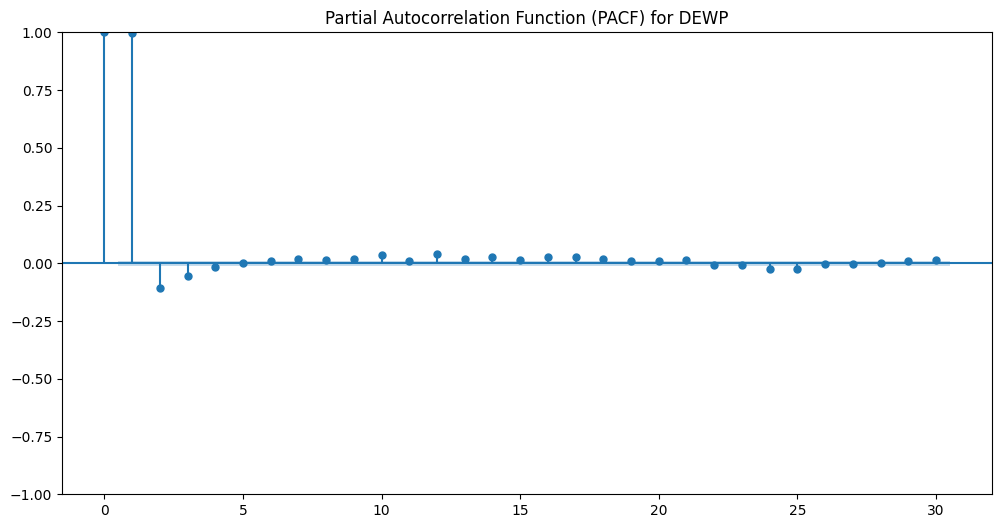

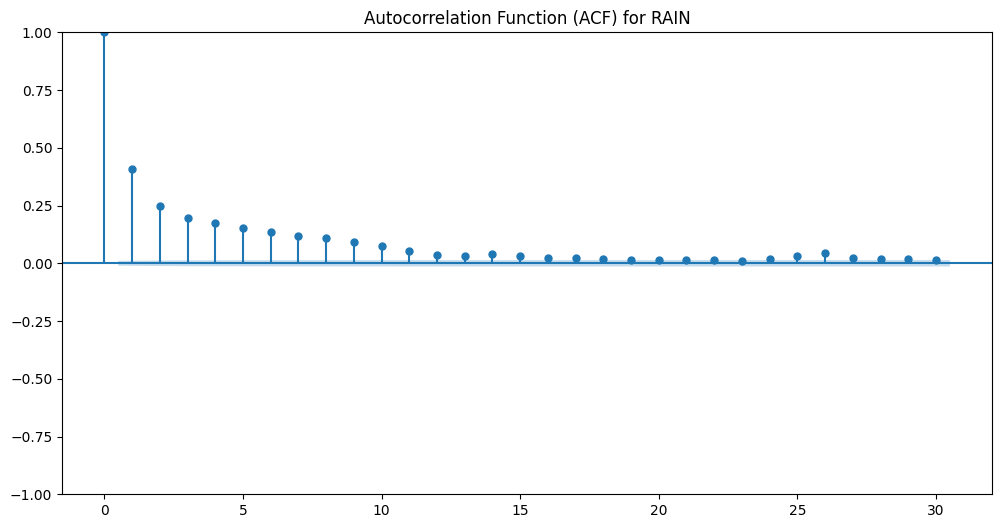

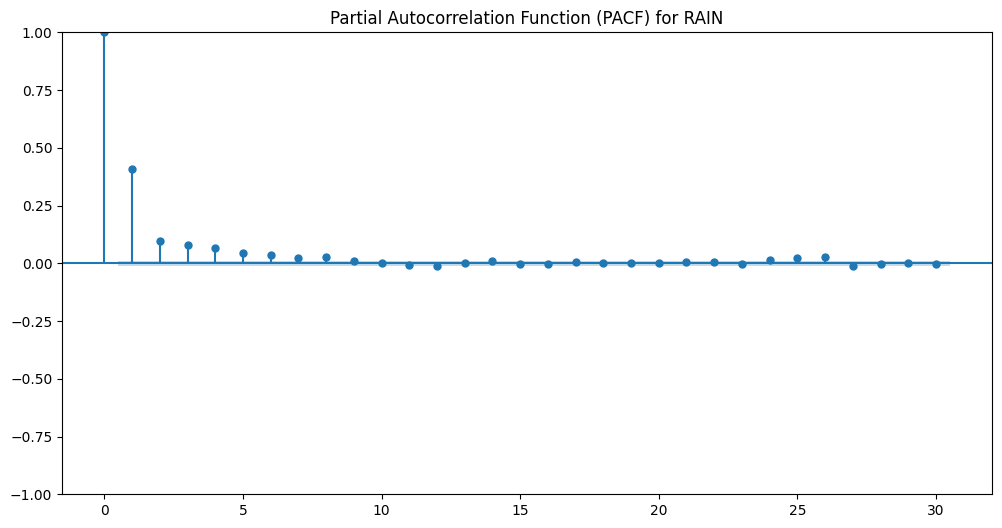

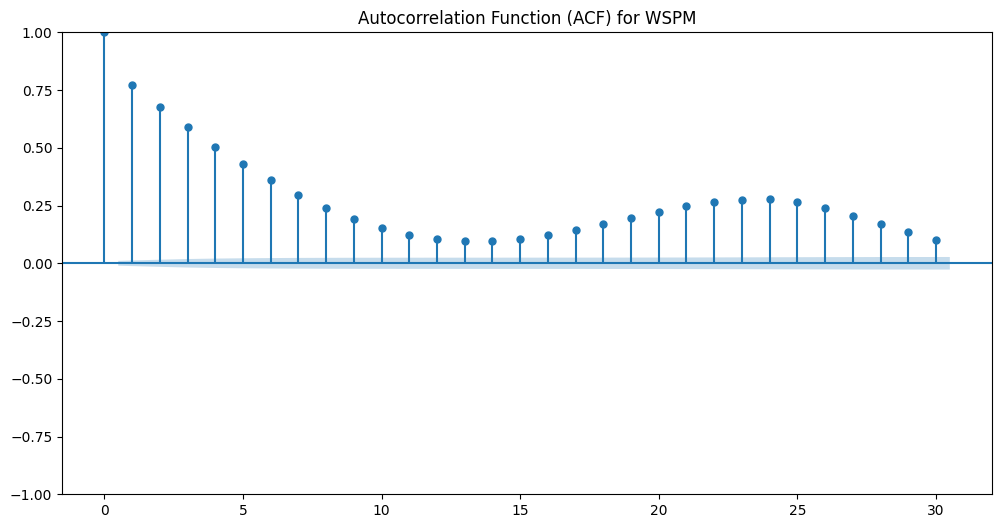

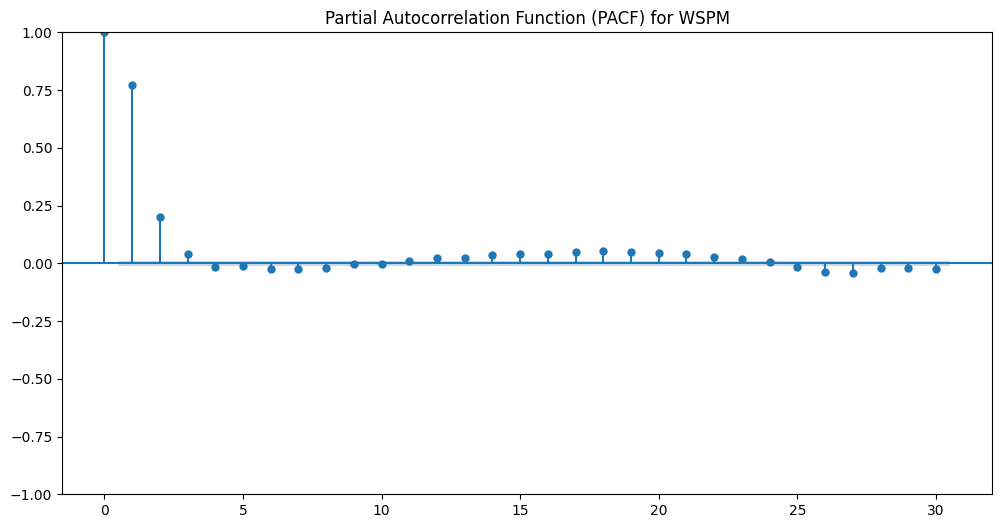

In [ ]:
# YOUR CODE HERE

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Loop through each column and plot ACF/PACF individually
for column in df_numerical.columns:
    # Plot ACF
    plt.figure(figsize=(12, 6))
    plot_acf(df_numerical[column], lags=30, ax=plt.gca()) # Pass a Series to plot_acf
    plt.title(f'Autocorrelation Function (ACF) for {column}')
    plt.show()

    # Plot PACF
    plt.figure(figsize=(12, 6))
    plot_pacf(df_numerical[column], lags=30, ax=plt.gca()) # Pass a Series to plot_pacf
    plt.title(f'Partial Autocorrelation Function (PACF) for {column}')
    plt.show()

In [ ]:
!pip install prophet

import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot


In [ ]:
dfAirQuality.head()

year_month_day_hour  No  year month day hour  PM2.5  PM10  SO2   NO2     CO  \
0 2013-03-01 00:00:00   1  2013     3   1    0    5.0  14.0  4.0  12.0  200.0   
1 2013-03-01 01:00:00   2  2013     3   1    1    8.0  12.0  6.0  14.0  200.0   
2 2013-03-01 02:00:00   3  2013     3   1    2    3.0   6.0  5.0  14.0  200.0   
3 2013-03-01 03:00:00   4  2013     3   1    3    5.0   5.0  5.0  14.0  200.0   
4 2013-03-01 04:00:00   5  2013     3   1    4    5.0   5.0  6.0  21.0  200.0   

     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM       station  \
0  85.0  -0.5  1024.5 -21.4   0.0  NNW   5.7  Nongzhanguan   
1  84.0  -0.7  1025.1 -22.1   0.0   NW   3.9  Nongzhanguan   
2  83.0  -1.2  1025.3 -24.6   0.0  NNW   5.3  Nongzhanguan   
3  84.0  -1.4  1026.2 -25.5   0.0    N   4.9  Nongzhanguan   
4  77.0  -1.9  1027.1 -24.5   0.0  NNW   3.2  Nongzhanguan   

                                       daily_average  
0  day
0         6.458333
0         6.458333
0   ...  
1  day
0        6.458333
12      19.375000
18    ...  
2  day
0        6.458333
0        6.458333
0     ...  
3  day
0         6.458333
0         6.458333
0   ...  
4  day
0         6.458333
0         6.458333
0   ...

In [ ]:
df_prophet = pd.DataFrame()

df_prophet['ds'] = pd.to_datetime(dfAirQuality['year_month_day_hour'])
df_prophet['y'] = dfAirQuality['PM2.5']
df_prophet.head()

ds    y
0 2013-03-01 00:00:00  5.0
1 2013-03-01 01:00:00  8.0
2 2013-03-01 02:00:00  3.0
3 2013-03-01 03:00:00  5.0
4 2013-03-01 04:00:00  5.0

In [ ]:
m = Prophet(yearly_seasonality=True)
m.fit(df_prophet)



DEBUG:cmdstanpy:input tempfile: /tmp/tmpos4rjz4m/qp2h9mo9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpos4rjz4m/_37hzb6f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53899', 'data', 'file=/tmp/tmpos4rjz4m/qp2h9mo9.json', 'init=/tmp/tmpos4rjz4m/_37hzb6f.json', 'output', 'file=/tmp/tmpos4rjz4m/prophet_modelog96l685/prophet_model-20240818062809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:28:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:28:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=12,
                                 freq='Y')

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower',
          'yhat_upper', 'trend',
          'trend_lower', 'trend_upper']].tail()

ds        yhat   yhat_lower   yhat_upper      trend  \
34443 2024-12-31 23:00:00  124.686326 -1439.300024  1622.268459  56.862801   
34444 2025-12-31 23:00:00  120.351112 -1797.266380  1928.206213  53.687022   
34445 2026-12-31 23:00:00  119.920709 -2115.093359  2229.966740  50.511243   
34446 2027-12-31 23:00:00  124.604481 -2596.350775  2603.902266  47.335463   
34447 2028-12-31 23:00:00  107.233127 -2872.838808  2885.875191  44.150983   

       trend_lower  trend_upper  
34443 -1499.613979  1549.401731  
34444 -1846.202238  1863.403953  
34445 -2226.993810  2199.732424  
34446 -2620.388189  2489.119495  
34447 -2952.092221  2851.746680

In [ ]:
m.predict

In [ ]:
df_prophet['predicted'] = m.fittedvalues

# Step 2: Out-of-sample forecast (e.g., forecast for the next 12 periods)
forecast_steps = 12
forecast = m.forecast(steps=forecast_steps)

# Step 3: Plotting
plt.figure(figsize=(14, 7))

# Plot original data
plt.plot(df_prophet['y'], label='Original')

# Plot in-sample predictions
plt.plot(df_prophet['predicted'], color='red', label='In-sample Predictions')

# Plot out-of-sample forecast
plt.plot(pd.date_range(start=df_prophet.index[-1], periods=forecast_steps+1, freq='M')[1:],
         forecast, color='green', label='Out-of-sample Forecast')

plt.title('Prophet Model - Original, In-sample Predictions, and Forecast')
plt.legend()
plt.show()

AttributeError: 'Prophet' object has no attribute 'fittedvalues'

### Implement ARIMA model (2 Points)

* Fit the timeseries data with ARIMA
* Find and interpret the loss (AIC)

In [ ]:
# YOUR CODE HERE for ARIMA Model
p = 1  # Based on PACF
d = 1  # Based on differencing
q = 2  # Based on ACF

for column in df_numerical.columns:
    if column == 'PM2.5':
        model = ARIMA(df_numerical[column], order=(p, d, q))  # Fit to a single column
        model_fit = model.fit()

        print(f"ARIMA Results for {column}:")
        print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.



ARIMA Results for PM2.5:
                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                35064
Model:                 ARIMA(1, 1, 2)   Log Likelihood             -162947.670
Date:                Sun, 18 Aug 2024   AIC                         325903.341
Time:                        06:09:51   BIC                         325937.201
Sample:                    03-01-2013   HQIC                        325914.125
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0181      0.126      0.143      0.886      -0.230       0.266
ma.L1          0.0177      0.127      0.140      0.889      -0.230       0.266
ma.L2         -0.0150      

#### Plot the predictions

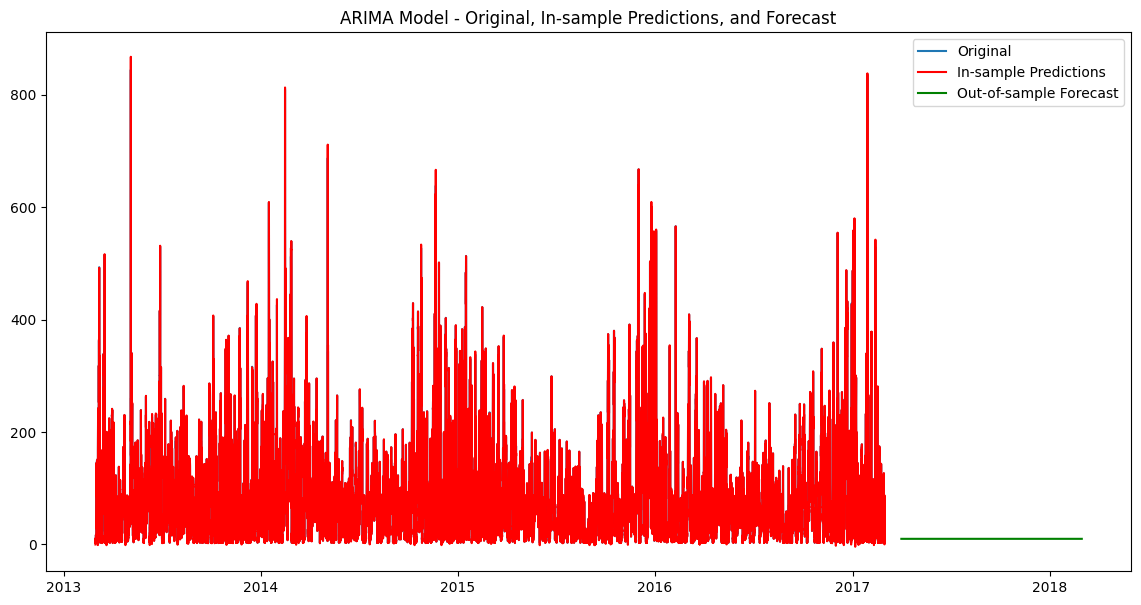

In [ ]:
# YOUR CODE HERE

# Step 1: In-sample predictions
df_numerical['predicted'] = model_fit.fittedvalues

# Step 2: Out-of-sample forecast (e.g., forecast for the next 12 periods)
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Step 3: Plotting
plt.figure(figsize=(14, 7))

# Plot original data
plt.plot(df_numerical['PM2.5'], label='Original')

# Plot in-sample predictions
plt.plot(df_numerical['predicted'], color='red', label='In-sample Predictions')

# Plot out-of-sample forecast
plt.plot(pd.date_range(start=df_numerical.index[-1], periods=forecast_steps+1, freq='M')[1:],
         forecast, color='green', label='Out-of-sample Forecast')

plt.title('ARIMA Model - Original, In-sample Predictions, and Forecast')
plt.legend()
plt.show()

In [ ]:
df_numerical

No  PM2.5  PM10  SO2   NO2     CO    O3  TEMP    PRES  \
year_month_day_hour                                                             
2013-03-01 00:00:00      1    5.0  14.0  4.0  12.0  200.0  85.0  -0.5  1024.5   
2013-03-01 01:00:00      2    8.0  12.0  6.0  14.0  200.0  84.0  -0.7  1025.1   
2013-03-01 02:00:00      3    3.0   6.0  5.0  14.0  200.0  83.0  -1.2  1025.3   
2013-03-01 03:00:00      4    5.0   5.0  5.0  14.0  200.0  84.0  -1.4  1026.2   
2013-03-01 04:00:00      5    5.0   5.0  6.0  21.0  200.0  77.0  -1.9  1027.1   
...                    ...    ...   ...  ...   ...    ...   ...   ...     ...   
2017-02-28 19:00:00  35060   14.0  21.0  3.0  27.0  400.0  72.0  12.5  1013.5   
2017-02-28 20:00:00  35061   18.0  27.0  3.0  37.0  400.0  59.0  11.6  1013.6   
2017-02-28 21:00:00  35062   15.0  39.0  5.0  50.0  600.0  41.0  10.8  1014.2   
2017-02-28 22:00:00  35063   11.0  35.0  6.0  49.0  500.0  41.0  10.5  1014.4   
2017-02-28 23:00:00  35064   10.0  28.0  7.0  48.0  600.0  39.0   8.6  1014.1   

                     DEWP  RAIN  WSPM  predicted  
year_month_day_hour                               
2013-03-01 00:00:00 -21.4   0.0   5.7   0.000000  
2013-03-01 01:00:00 -22.1   0.0   3.9   5.000112  
2013-03-01 02:00:00 -24.6   0.0   5.3   8.105642  
2013-03-01 03:00:00 -25.5   0.0   4.9   2.774381  
2013-03-01 04:00:00 -24.5   0.0   3.2   5.152015  
...                   ...   ...   ...        ...  
2017-02-28 19:00:00 -16.2   0.0   2.4  15.937500  
2017-02-28 20:00:00 -15.1   0.0   0.9  13.893284  
2017-02-28 21:00:00 -13.3   0.0   1.1  18.174070  
2017-02-28 22:00:00 -12.9   0.0   1.2  14.828046  
2017-02-28 23:00:00 -15.9   0.0   1.3  10.907410  

[35064 rows x 13 columns]

### Implement SARIMAX model (optional)

A SARIMA model can be tuned with two kinds of orders: (p,d,q) order, which refers to the order of the time series. This order is also used in the ARIMA model (which does not consider seasonality); (P,D,Q,S) seasonal order, which refers to the order of the seasonal component of the time series.

$\color{blue}{\text{Note: Implementing SARIMAX in Colab may crash the session as it may run out of RAM.}}$


$\color{blue}{\text{Alternatively you could use (free) AWS Sagemaker StudioLab. Refer to AWS Sagemaker StudioLab introductory video }}$

$$\href{https://drive.google.com/file/d/13cEzQvTzngnF8ytmHEKxUtBk72d_PqQN/view?usp=drive_link}{Click Here}$$


In [ ]:
df_numerical.head()

No  PM2.5  PM10  SO2   NO2     CO    O3  TEMP    PRES  \
year_month_day_hour                                                          
2013-03-01 00:00:00   1    5.0  14.0  4.0  12.0  200.0  85.0  -0.5  1024.5   
2013-03-01 01:00:00   2    8.0  12.0  6.0  14.0  200.0  84.0  -0.7  1025.1   
2013-03-01 02:00:00   3    3.0   6.0  5.0  14.0  200.0  83.0  -1.2  1025.3   
2013-03-01 03:00:00   4    5.0   5.0  5.0  14.0  200.0  84.0  -1.4  1026.2   
2013-03-01 04:00:00   5    5.0   5.0  6.0  21.0  200.0  77.0  -1.9  1027.1   

                     DEWP  RAIN  WSPM  predicted  
year_month_day_hour                               
2013-03-01 00:00:00 -21.4   0.0   5.7   0.000000  
2013-03-01 01:00:00 -22.1   0.0   3.9   5.000112  
2013-03-01 02:00:00 -24.6   0.0   5.3   8.105642  
2013-03-01 03:00:00 -25.5   0.0   4.9   2.774381  
2013-03-01 04:00:00 -24.5   0.0   3.2   5.152015

In [ ]:
#
# Assume the PM2.5 values are in a column named 'PM2.5_column'
pm25_values = dfAirQuality['PM2.5']


# Number of hours in a day
hours_per_day = 24

# Calculate the number of days
num_days = len(pm25_values) // hours_per_day

# Create a new DataFrame with daily data
# Create an index for each day
daily_indices = pd.Series(range(num_days)).repeat(hours_per_day).reset_index(drop=True)
daily_df = pd.DataFrame({'day': daily_indices, 'PM2.5': pm25_values})



# Compute daily averages
daily_averages = daily_df.groupby('day')['PM2.5'].mean()

dfAirQuality['daily_average'] = dfAirQuality['PM2.5'].map(lambda x: daily_averages[daily_indices.loc[dfAirQuality.index[dfAirQuality['PM2.5'] == x]]])

dfAirQuality['daily_average']

0        day
0         6.458333
0         6.458333
0   ...
1        day
0        6.458333
12      19.375000
18    ...
2        day
0        6.458333
0        6.458333
0     ...
3        day
0         6.458333
0         6.458333
0   ...
4        day
0         6.458333
0         6.458333
0   ...
                               ...                        
35059    day
1       28.750000
3       22.875000
8     ...
35060    day
1       28.750000
17      69.083333
26    ...
35061    day
8       56.375000
8       56.375000
12    ...
35062    day
0        6.458333
0        6.458333
0     ...
35063    day
0        6.458333
0        6.458333
3     ...
Name: daily_average, Length: 35064, dtype: object

In [ ]:

type(daily_averages)

pandas.core.series.Series

In [ ]:
# Fit the SARIMA model
# YOUR CODE HERE

# Import necessary library
import statsmodels.api as sm

# that contains the time series you want to model
target_variable = 'PM2.5'

df_every_24th_row = df_numerical[target_variable].iloc[17::24]

print(daily_averages)

# Fit the SARIMA model with every 24th value
model = sm.tsa.SARIMAX(df_every_24th_row,
                        order=(1, 1, 1),
         #               seasonal_order=(1, 1, 1, 12),
                        seasonal_order = (1, 1, 1, 365),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

# Fit the model
results = model.fit()

# Print the summary of the model
print(results.summary())

day
0         6.458333
1        28.750000
2       104.750000
3        22.875000
4       131.833333
           ...    
1456     27.590909
1457     10.913043
1458     25.826087
1459     76.090909
1460     17.523810
Name: PM2.5, Length: 1461, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [ ]:
# Fit the SARIMA model using sm.tsa.SARIMAX

model = sm.tsa.SARIMAX(df_numerical[target_variable],
                        order=(1, 1, 1),
         #               seasonal_order=(1, 1, 1, 12),
                        seasonal_order = (1, 1, 1, 8760),
                        enforce_stationarity=False,
                        enforce_invertibility=False)


# Fit the model
results = model.fit()

# Print the summary of the model
print(results.summary())

#### Plot the predictions

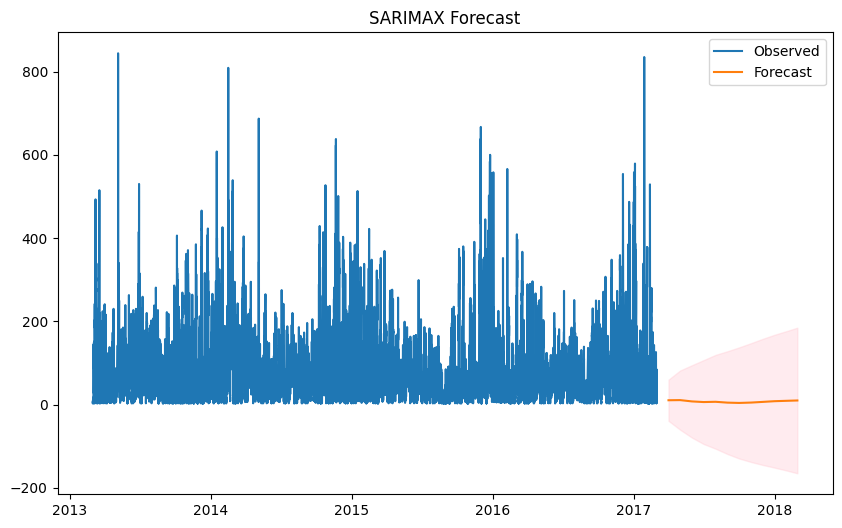

In [ ]:
# predicting with SARIMA
# YOUR CODE HERE

forecast_steps = 12  # Number of steps to forecast
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df_numerical.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Get confidence intervals of the forecast
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df_numerical.index, df_numerical['PM2.5'], label='Observed')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMAX Forecast')
plt.legend()
plt.show()

### Report Analysis

* Comment on the trend and seasonality of the time series data
* Comment on results of the Dickey Fuller test analysis
* Is the air quality becoming poorer across the years?
* Do we see spikes indicating poor air quality in particular periods each year? What could be the reasons?

For related reading, refer to: [Time Series Analysis of PM 2.5 in Beijing](https://ionides.github.io/531w20/midterm_project/project11/midterm-project.html)